# Hands on: Visualization


### Overview

- [The Data](#ch1)</a>

- [Import the file titanicData.csv to a dataframe](#ch1_1)</a>

- [Obtain a summary of the data.](#ch1_2)</a>



- [4.1.	Visualy inspect if the dataset is imbalanced.](#ch4_1)</a>

- [4.2. Show the number of passengers by gender. Which gender had higher survival rate?](#ch4_1)</a>

- [4.3.	Show the number of passengers per class and gender.](#ch4_3)</a>

- [4.4. Show the distribution of passengers by age. Suggestion: create bins of width equal to 10. Comment on the results. Which age group had more survivals?](#ch4_4)</a>

- [4.5. Plot the total of minors w.r.t the survival status and passenger class.](#ch4_5)</a>

- [4.6. Show the distribution of the age of the minors according to the survival status.](#ch4_6)</a>

- [4.7. Add the information of the density estimation to the previous graph.](#ch4_7)</a>

- [4.8. Did passenger class make any difference to his survival?](#ch4_8)</a>

- [Does the survival of passenger depending on ticket class?](#ch4_8_1)</a>

- [4.9. Show male and female survival per class and by age.](#ch4_9)</a>

- [4.10. Did a person travelling with others had more survival possibility?](#ch4_10)</a>

- [Now lets review these by their survival](#ch4_10_1)</a>

- [4.11. How does Embarkation vary across age?](#ch4_11)</a>

- [4.12. Show the distribution of ticked fare w.r.t ticket class and gender.](#ch4_12)</a>

- [4.13. Inspect the association between passenger class and fare.](#ch4_13)</a>

- [4.14. Show the relationship between the attributes age and fare.](#ch4_14)</a>

- [4.15. Which are the features that most correlate with survival status?](#ch4_15)</a>


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

# The Data <a name="ch1"></a>
### The titanic dataset contains information on the survival status of individual passengers on the Titanic 

**Pass_class** - Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
    
**name**	

**sex**	

**age**	

**sibsp** - Number of Siblings/Spouses Aboard

**parch** - Number of Parents/Children Aboard	

**ticket** - Ticket number	

**fare** - Passenger fare	

**cabin**	- Cabin number	

**embarked** - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
    
**survived** - Survival status (0 = No, 1 = Yes)


### Import the file titanicData.csv to a dataframe (csv file is available in eLearning). <a name="ch1_1"></a>

In [5]:
df= pd.read_csv("titanicData.csv", sep=';')
df

#create dataset with X and Y coordinates where x=[2,5,8] and y=[0,8,2.4,5.5]
x = [2,5,8]
y = [0.8,2.4,5.5]
dfteste = pd.DataFrame({'x':x, 'y':y})
dfteste
#calculate mean of x and y
x_mean =   dfteste['x'].mean()
y_mean =   dfteste['y'].mean()
print(x_mean)
print(y_mean)
#calculate cov matrix
cov_matrix = np.cov(   dfteste['x'], dfteste['y'])
print(cov_matrix)

#calculate correlation matrix
corr_matrix = np.corrcoef( dfteste['x'],   dfteste['y'])
print(corr_matrix)

#calculate euclidean distance between two points (x1,y1) and (x2,y2)
def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

e=euclidean_distance(2, 0.8, 5, 2.4)
e

#calculate manhattan distance between two points (x1,y1) and (x2,y2)
def manhattan_distance(x1, y1, x2, y2):
    return abs(x1-x2) + abs(y1-y2)

m=manhattan_distance(2, 0.8, 5, 2.4)
m

#calculate cossine distance between two points (x1,y1) and (x2,y2)
def cossine_distance(x1, y1, x2, y2):
    return 1 - (x1*x2 + y1*y2)/(np.sqrt(x1**2 + y1**2)*np.sqrt(x2**2 + y2**2))

c=cossine_distance(2, 0.8, 5, 2.4)
c




5.0
2.9
[[9.   7.05]
 [7.05 5.71]]
[[1.         0.98344439]
 [0.98344439 1.        ]]


0.002244570975354354

### Insert new attributes

In [6]:
df.insert(1, "Pclass",df.Pass_class)
df.loc[df.Pclass == 1,'Pclass'] = '1st'
df.loc[df.Pclass == 2,'Pclass'] = '2nd'
df.loc[df.Pclass == 3,'Pclass'] = '3rd'

df.insert(12, "survival",df.survived)
df.loc[df.survival == 0,'survival'] = 'not survived'
df.loc[df.survival == 1,'survival'] = 'survived'

### Obtain a summary of the data  <a name="ch1_2"></a>

In [7]:

#summarize the data
df.describe()


,Pass_class,age,sibsp,parch,fare,survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,0.381971
std,0.837836,14.413500,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


##	4.1.	Visualy inspect if the dataset is imbalanced. <a name="ch4_1"></a>

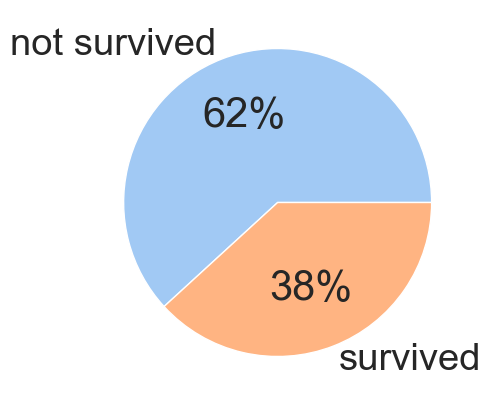

In [8]:
data= df.survival.value_counts()

colors = sns.color_palette('pastel')[0:7]
sns.set_theme(palette=colors, font="arial", font_scale= 2.5)
plt.figure(figsize=(5,5))
plt.pie(data, labels = data.index, colors = colors, autopct='%.0f%%')
plt.show()

##	4.2.	Show the number of passengers by gender. Which gender had higher survival rate? <a name="ch4_2"></a>

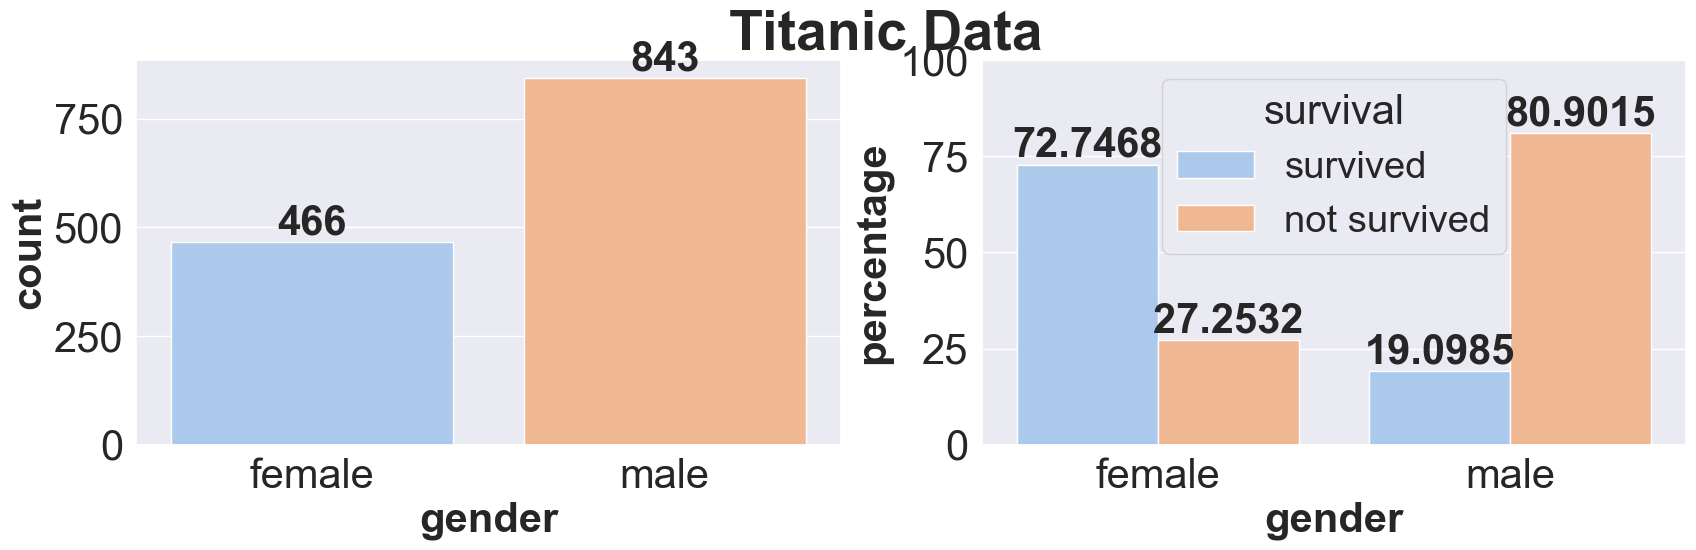

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Titanic Data',fontweight='bold', fontsize=40)

g = sns.countplot(ax=axes[0], x='sex', data=df)
axes[0].bar_label(g.containers[0],fontweight='bold', fontsize=30)
axes[0].set_xlabel("gender",fontweight='bold', fontsize=30)
axes[0].set_ylabel("count",fontweight='bold', fontsize=30)
axes[0].tick_params(labelsize=30)


df1 = df.groupby('sex')['survival'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.barplot(ax=axes[1], x='sex', y='percent',hue='survival',data=df1)
axes[1].bar_label(g.containers[0],fontweight='bold', fontsize=30)
axes[1].bar_label(g.containers[1],fontweight='bold', fontsize=30)
axes[1].set_xlabel("gender",fontweight='bold', fontsize=30)
axes[1].set_ylabel("percentage",fontweight='bold', fontsize=30)
axes[1].set_ylim(0,100)
axes[1].tick_params(labelsize=30)

plt.show()    

##	4.3.	Show the number of passengers per class and gender. <a name="ch4_3"></a>

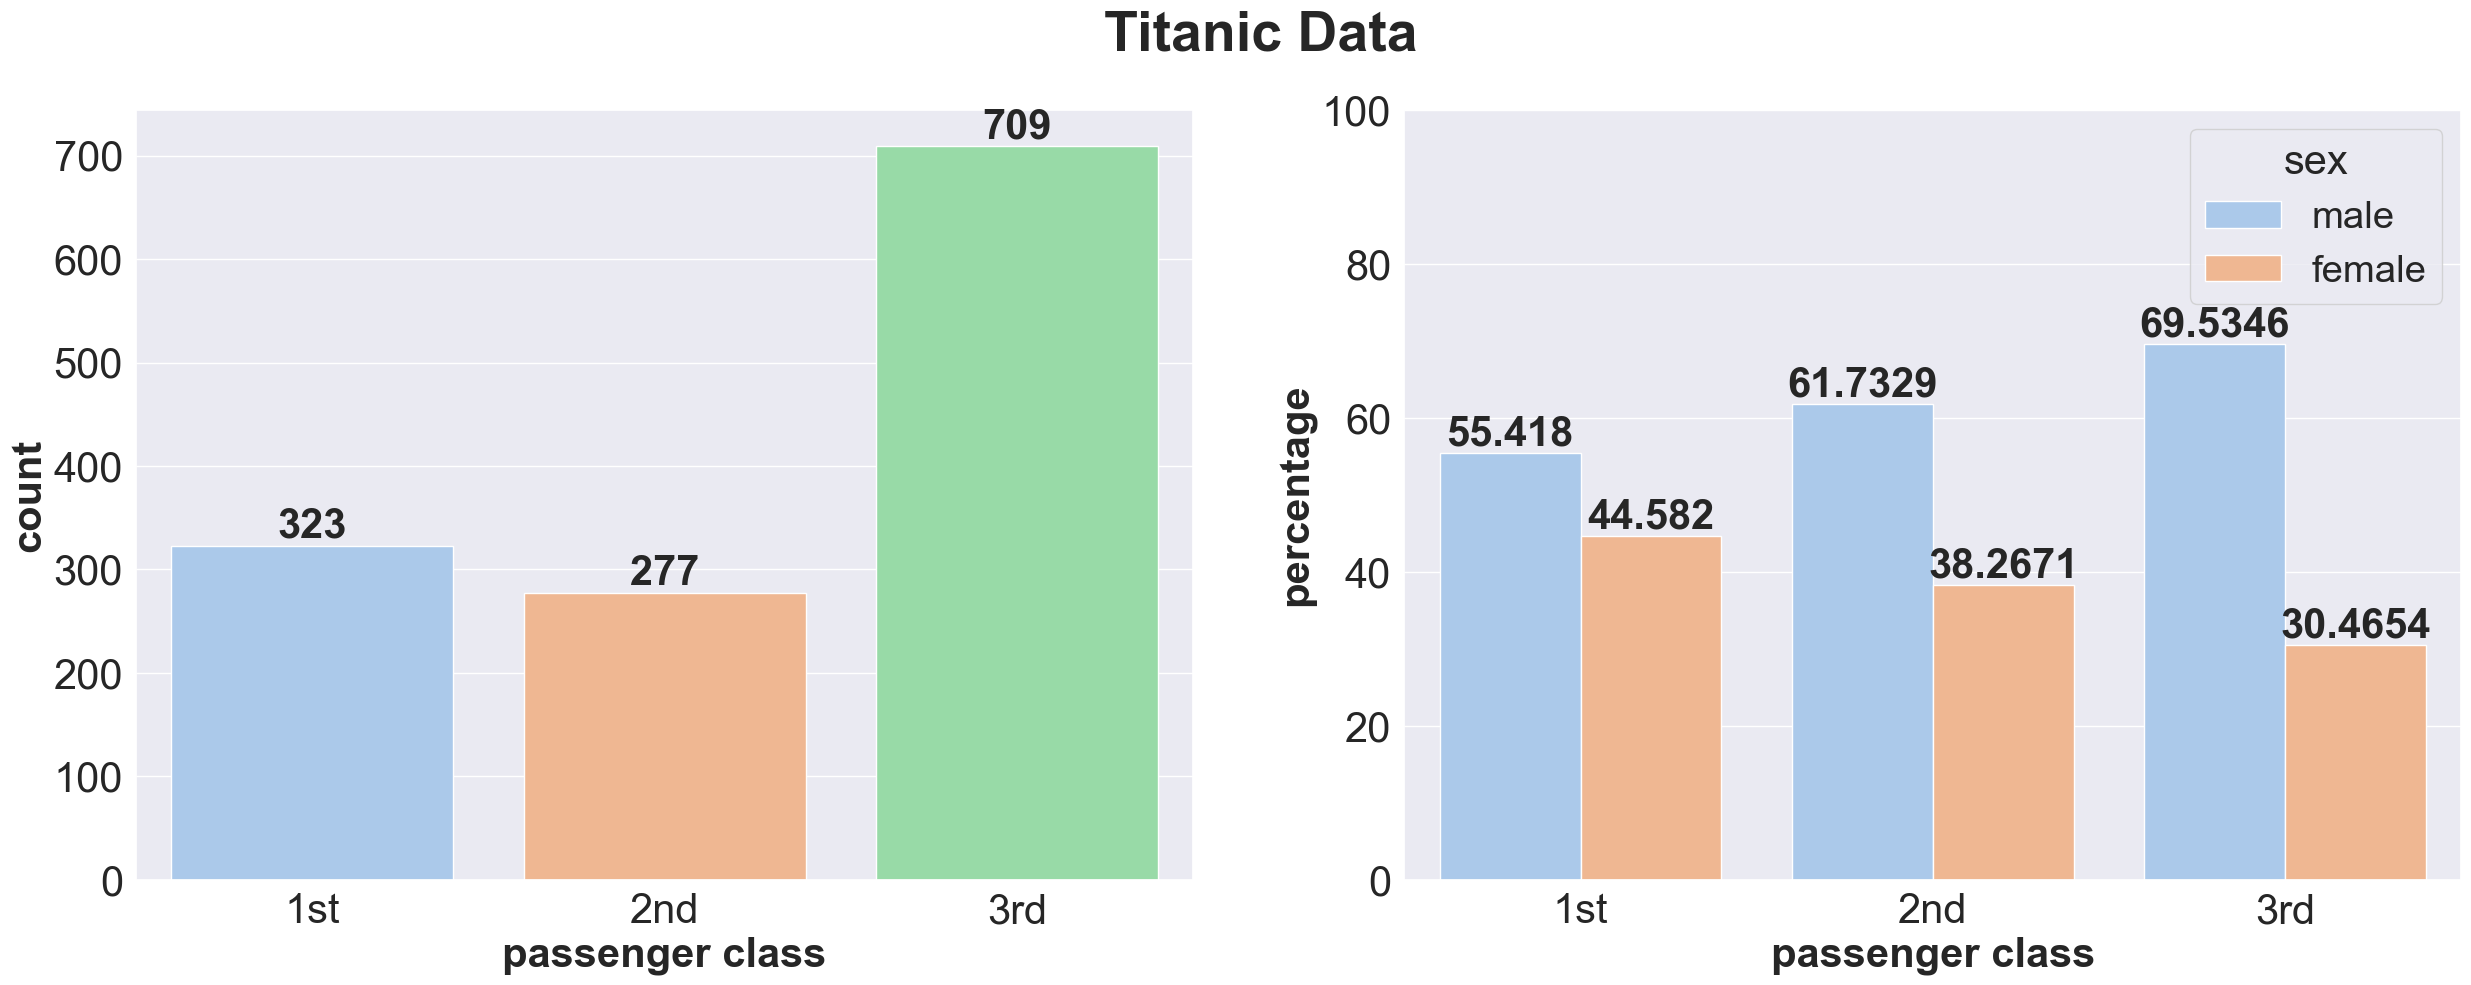

In [10]:
#show the number of passenger per class and gender
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('Titanic Data',fontweight='bold', fontsize=40)

g = sns.countplot(ax=axes[0], x='Pclass', data=df)
axes[0].bar_label(g.containers[0],fontweight='bold', fontsize=30)
axes[0].set_xlabel("passenger class",fontweight='bold', fontsize=30)
axes[0].set_ylabel("count",fontweight='bold', fontsize=30)
axes[0].tick_params(labelsize=30)

df1 = df.groupby('Pclass')['sex'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.barplot(ax=axes[1], x='Pclass', y='percent',hue='sex',data=df1)
axes[1].bar_label(g.containers[0],fontweight='bold', fontsize=30)
axes[1].bar_label(g.containers[1],fontweight='bold', fontsize=30)
axes[1].set_xlabel("passenger class",fontweight='bold', fontsize=30)
axes[1].set_ylabel("percentage",fontweight='bold', fontsize=30)
axes[1].set_ylim(0,100)
axes[1].tick_params(labelsize=30)

plt.show()


##	4.4.	Show the distribution of passengers by age. Suggestion: create bins of width equal to 10. 

## Comment on the results. Which age group had more survivals?  <a name="ch4_4"></a>

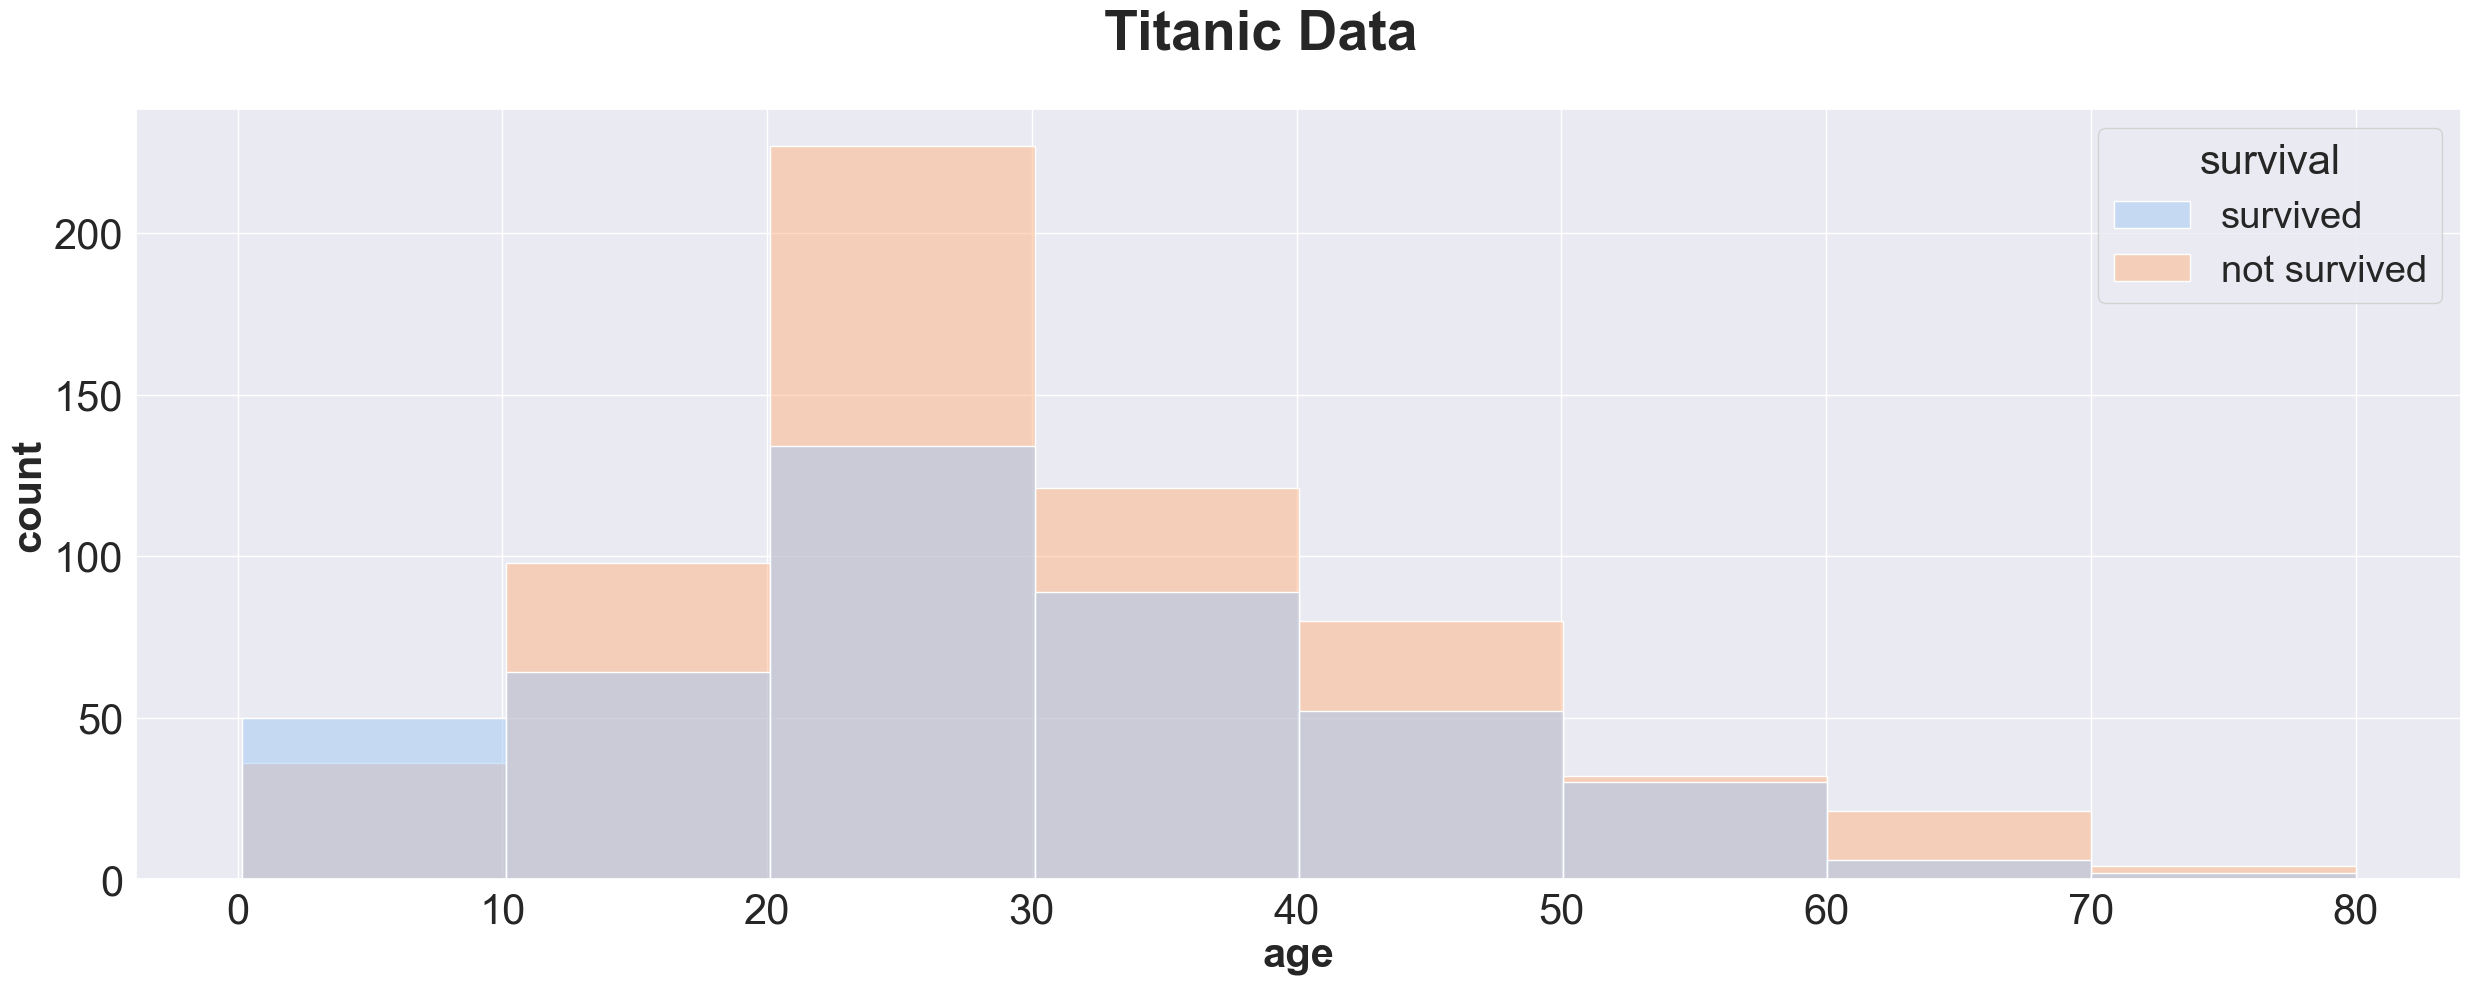

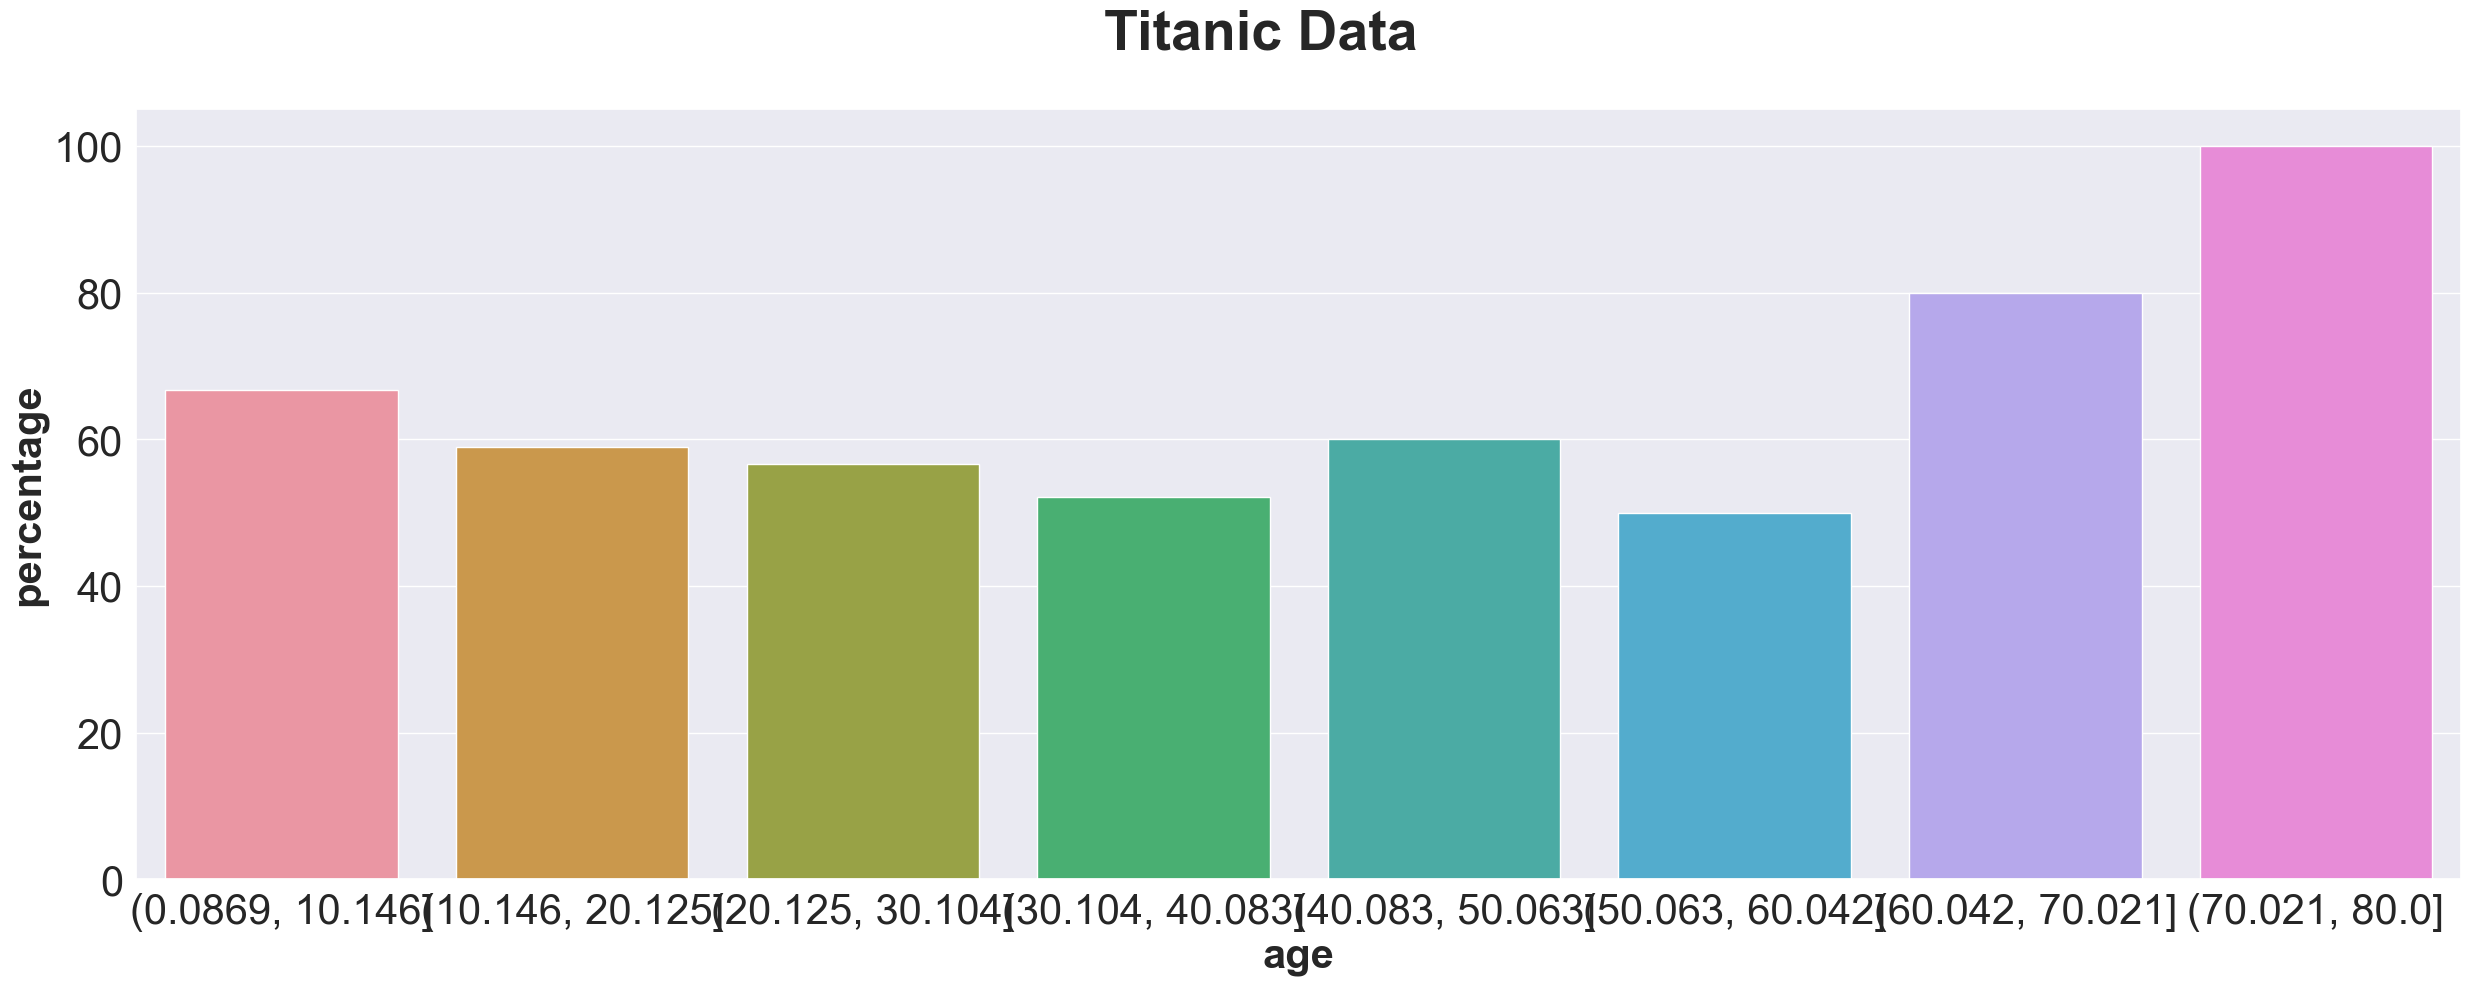

In [11]:
maxAge = df.age.max()
minAge = df.age.min()
numberBins = int(np.round((maxAge-minAge)/10))
numberBins
#Show the distribution of passengers by age
fig, axes = plt.subplots(1 ,figsize=(30, 10))
fig.suptitle('Titanic Data',fontweight='bold', fontsize=40)


g=sns.histplot( data=df, hue='survival', x='age', bins=numberBins)
g.set_xlabel("age",fontweight='bold', fontsize=30)
g.set_ylabel("count",fontweight='bold', fontsize=30)
g.tick_params(labelsize=30)
plt.show()

# which group of age passengers (intervals 10 years) had the highest survival rate

df1 = df.groupby('age')['survival'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

df1['age'] = pd.cut(df1['age'], bins=numberBins)
df1 = df1.groupby('age')['percent'].median()
df1 = df1.rename('percent').reset_index()

fig, axes = plt.subplots(1 ,figsize=(30, 10))
fig.suptitle('Titanic Data',fontweight='bold', fontsize=40)

g=sns.barplot(data=df1, x='age', y='percent')
g.set_xlabel("age",fontweight='bold', fontsize=30)
g.set_ylabel("percentage",fontweight='bold', fontsize=30)
g.tick_params(labelsize=30)
plt.show()











##	4.5.	Plot the total of minors w.r.t the survival status and passenger class.  <a name="ch4_5"></a>

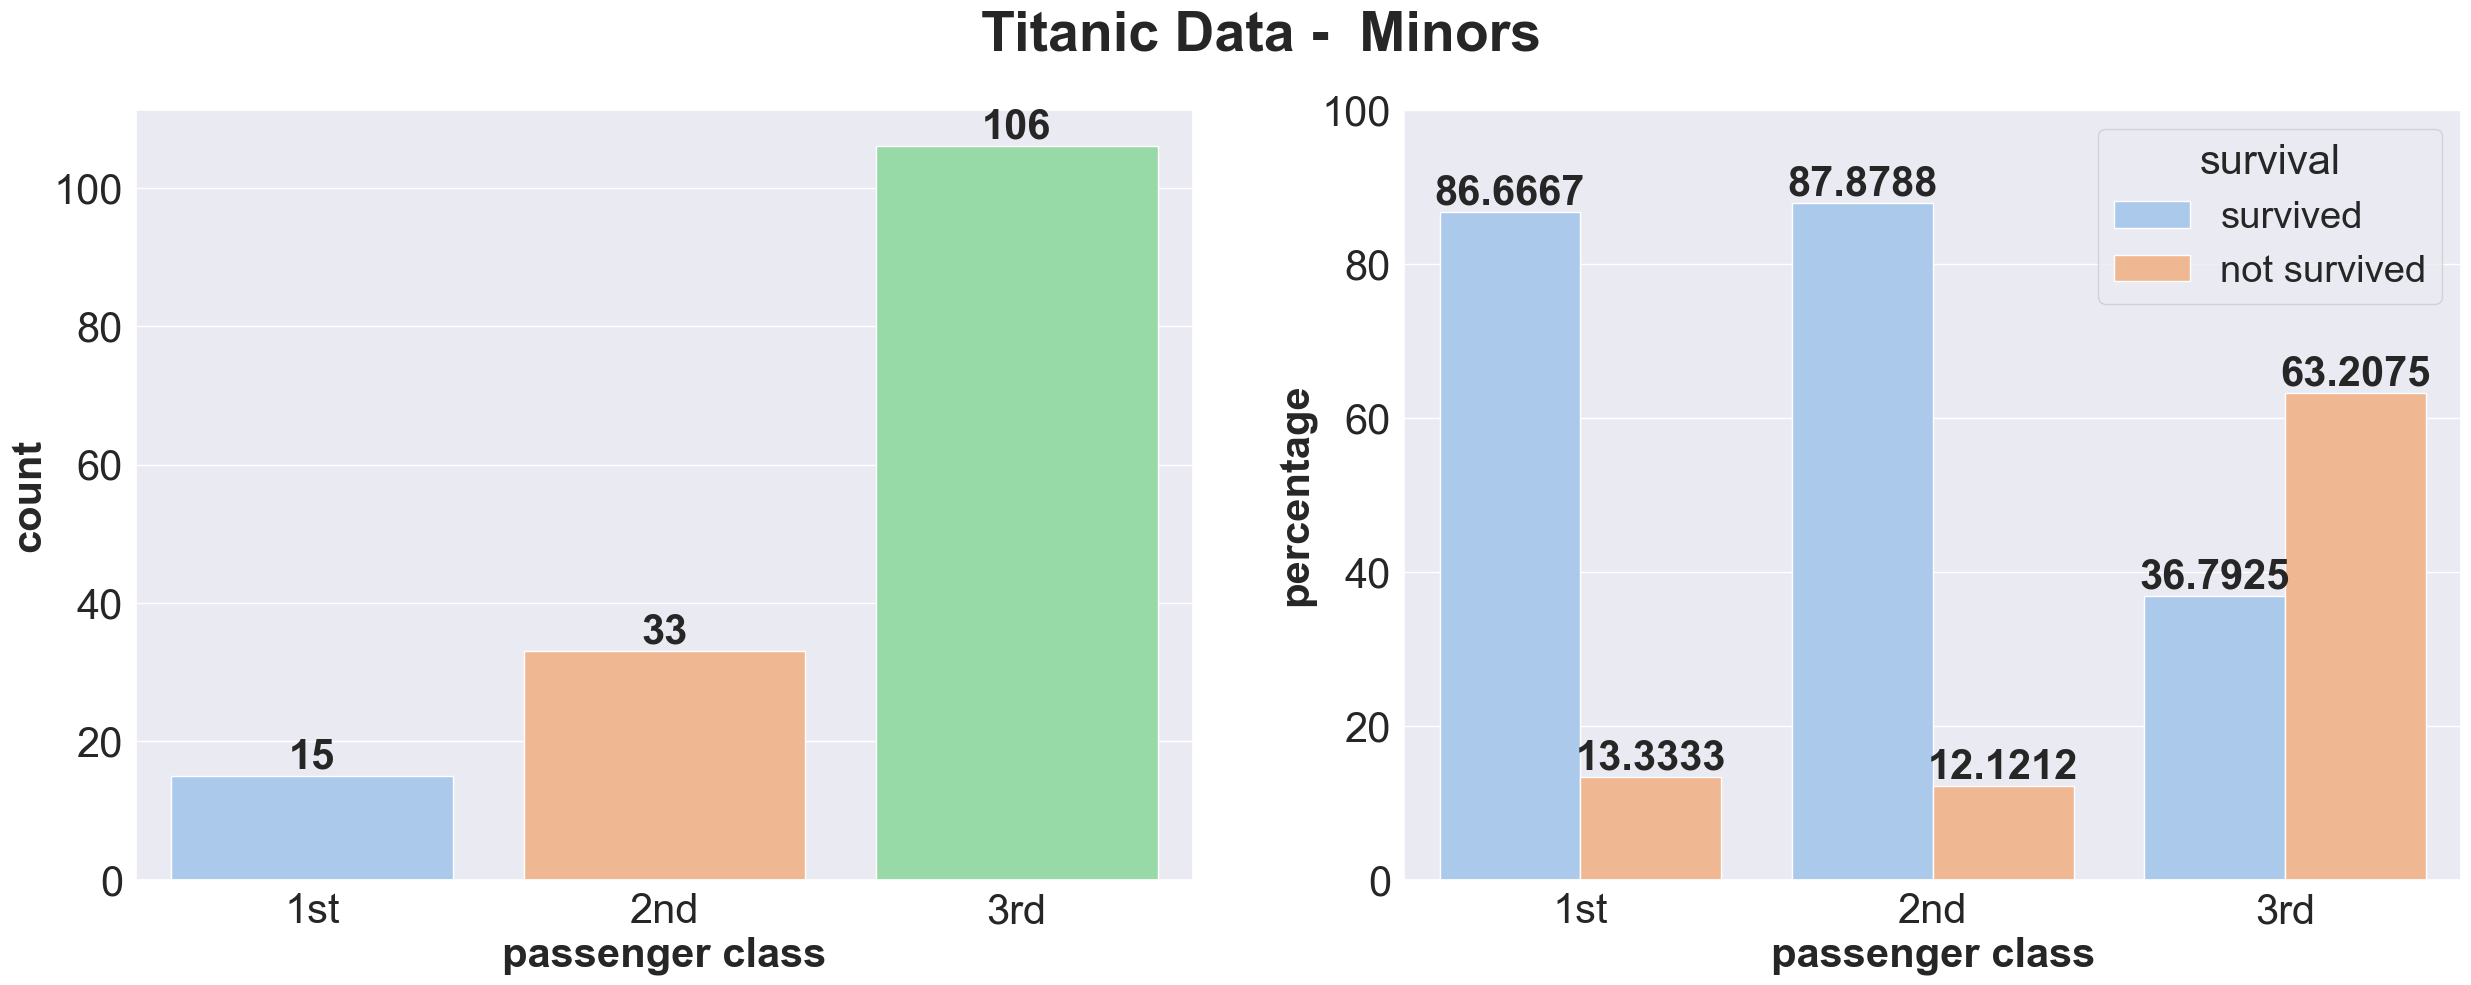

In [12]:
df_minors = df[df.age < 18]
df_minors
#Plot the total of minors w.r.t the survival status and passenger class.
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('Titanic Data -  Minors',fontweight='bold', fontsize=40)

g = sns.countplot(ax=axes[0], x='Pclass', data=df_minors)
axes[0].bar_label(g.containers[0],fontweight='bold', fontsize=30)
axes[0].set_xlabel("passenger class",fontweight='bold', fontsize=30)
axes[0].set_ylabel("count",fontweight='bold', fontsize=30)
axes[0].tick_params(labelsize=30)

df1 = df_minors.groupby('Pclass')['survival'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.barplot(ax=axes[1], x='Pclass', y='percent',hue='survival',data=df1)
axes[1].bar_label(g.containers[0],fontweight='bold', fontsize=30)
axes[1].bar_label(g.containers[1],fontweight='bold', fontsize=30)
axes[1].set_xlabel("passenger class",fontweight='bold', fontsize=30)
axes[1].set_ylabel("percentage",fontweight='bold', fontsize=30)
axes[1].set_ylim(0,100)
axes[1].tick_params(labelsize=30)

plt.show()




##	4.6.	Show the distribution of the age of the  minors according to the survival status.  <a name="ch4_6"></a>

C:\Users\TiagoC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\TiagoC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


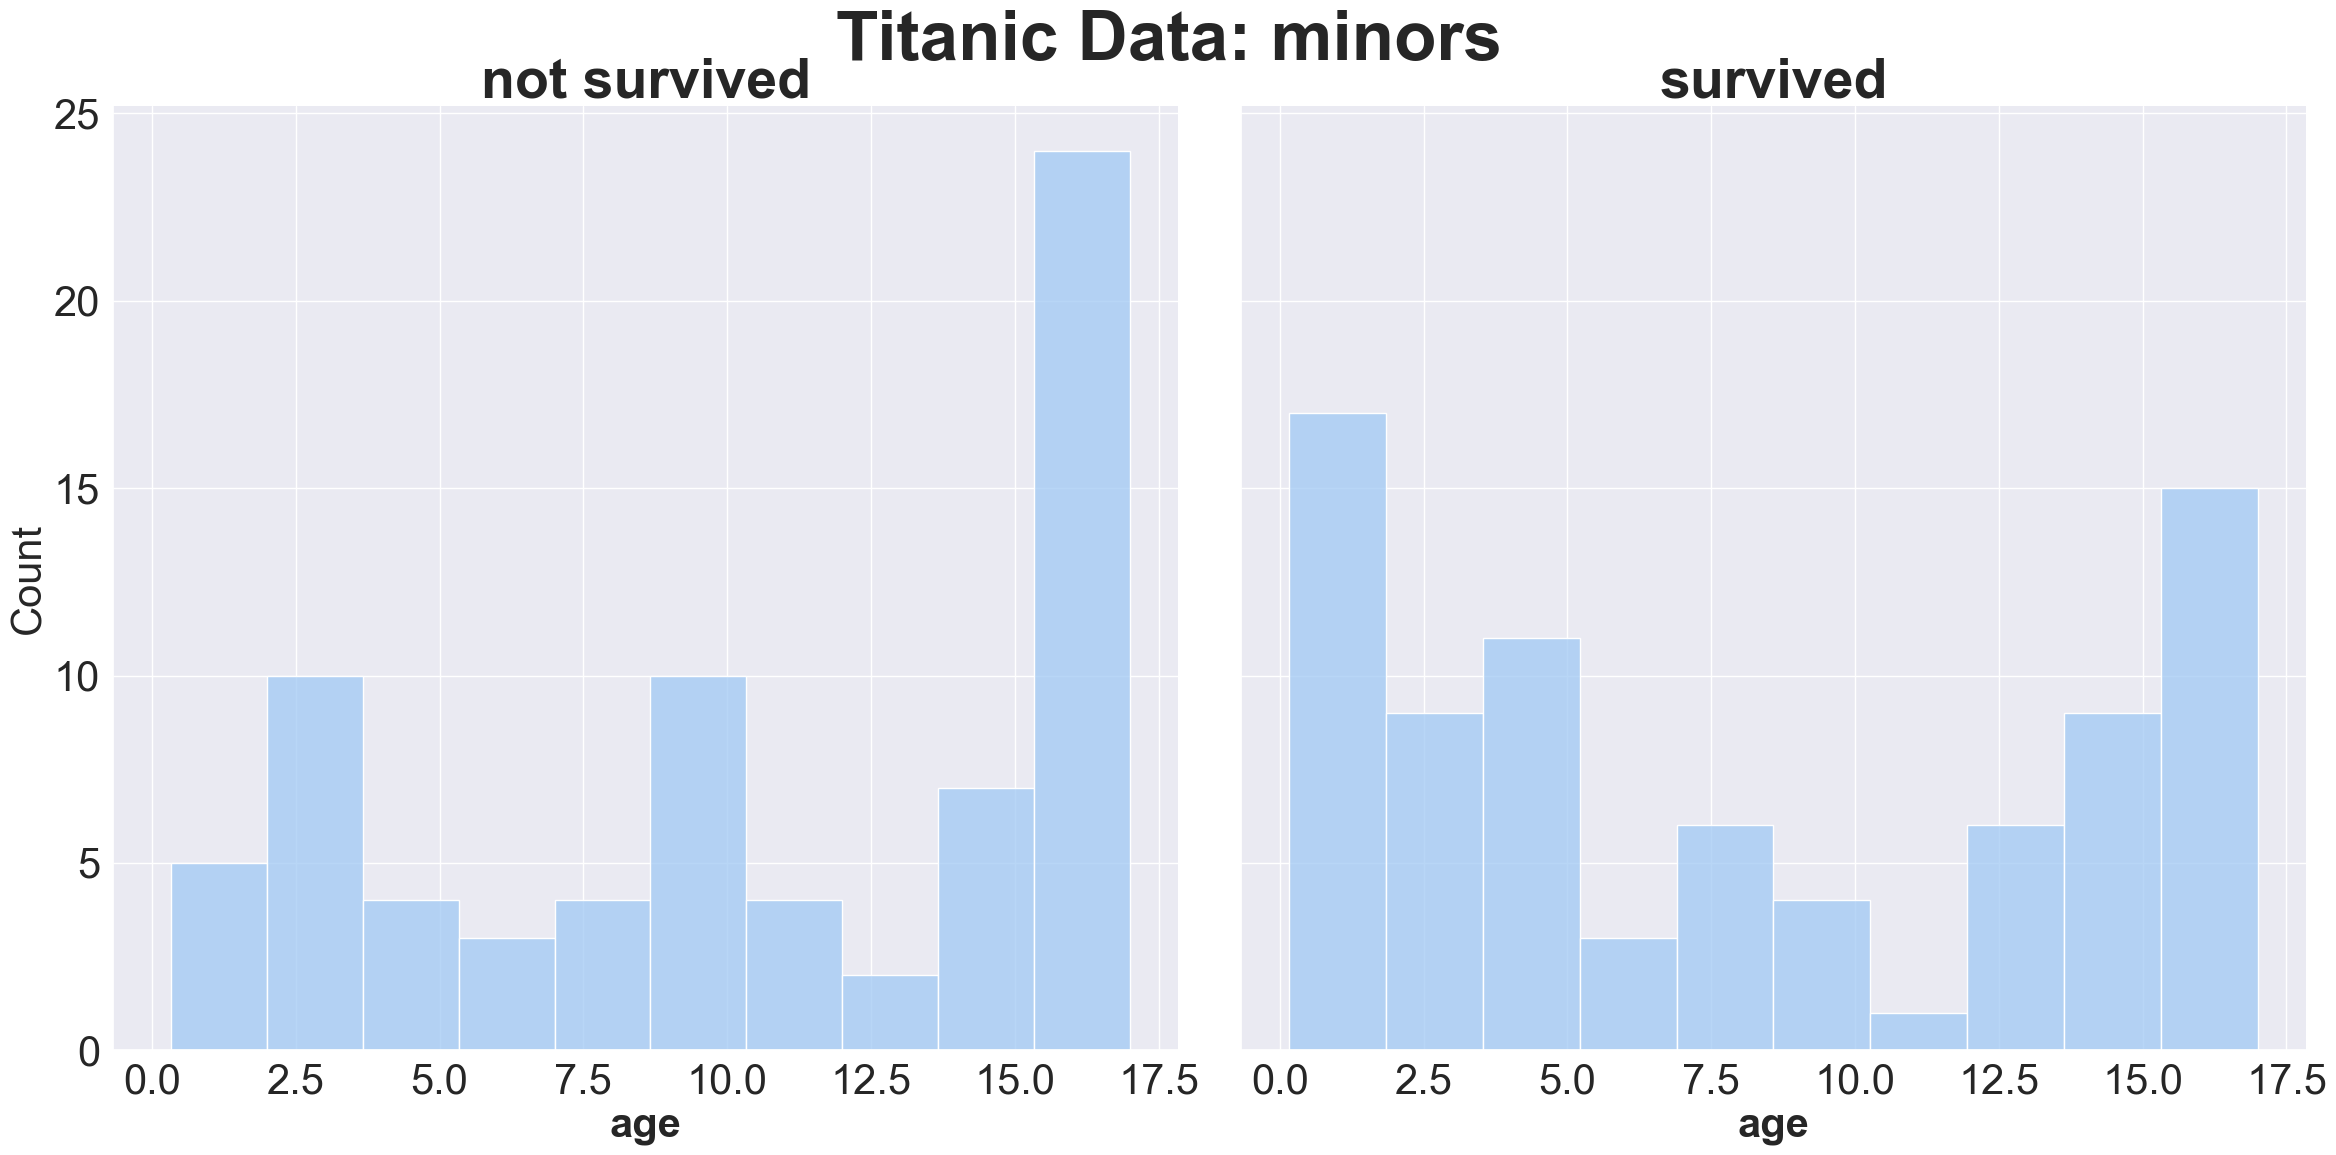

In [13]:
g = sns.FacetGrid(df_minors,col='survived',  margin_titles=True, height=12)
g.map(sns.histplot,'age', bins = 10)
g.fig.suptitle('Titanic Data: minors',fontweight='bold', fontsize=50)
g.axes[0,0].set_title('not survived',fontweight='bold', fontsize=40)
g.axes[0,1].set_title('survived',fontweight='bold', fontsize=40)
g.axes[0,0].set_xlabel('age',fontweight='bold', fontsize=30)
g.axes[0,1].set_xlabel('age',fontweight='bold', fontsize=30)
g.axes[0,0].tick_params(labelsize=30)
g.axes[0,1].tick_params(labelsize=30)
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp



##	4.7.	Add the information of the density estimation to the previous graph.  <a name="ch4_7"></a>

C:\Users\TiagoC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\TiagoC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\TiagoC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\TiagoC\AppData\Local\Packages\PythonSoft

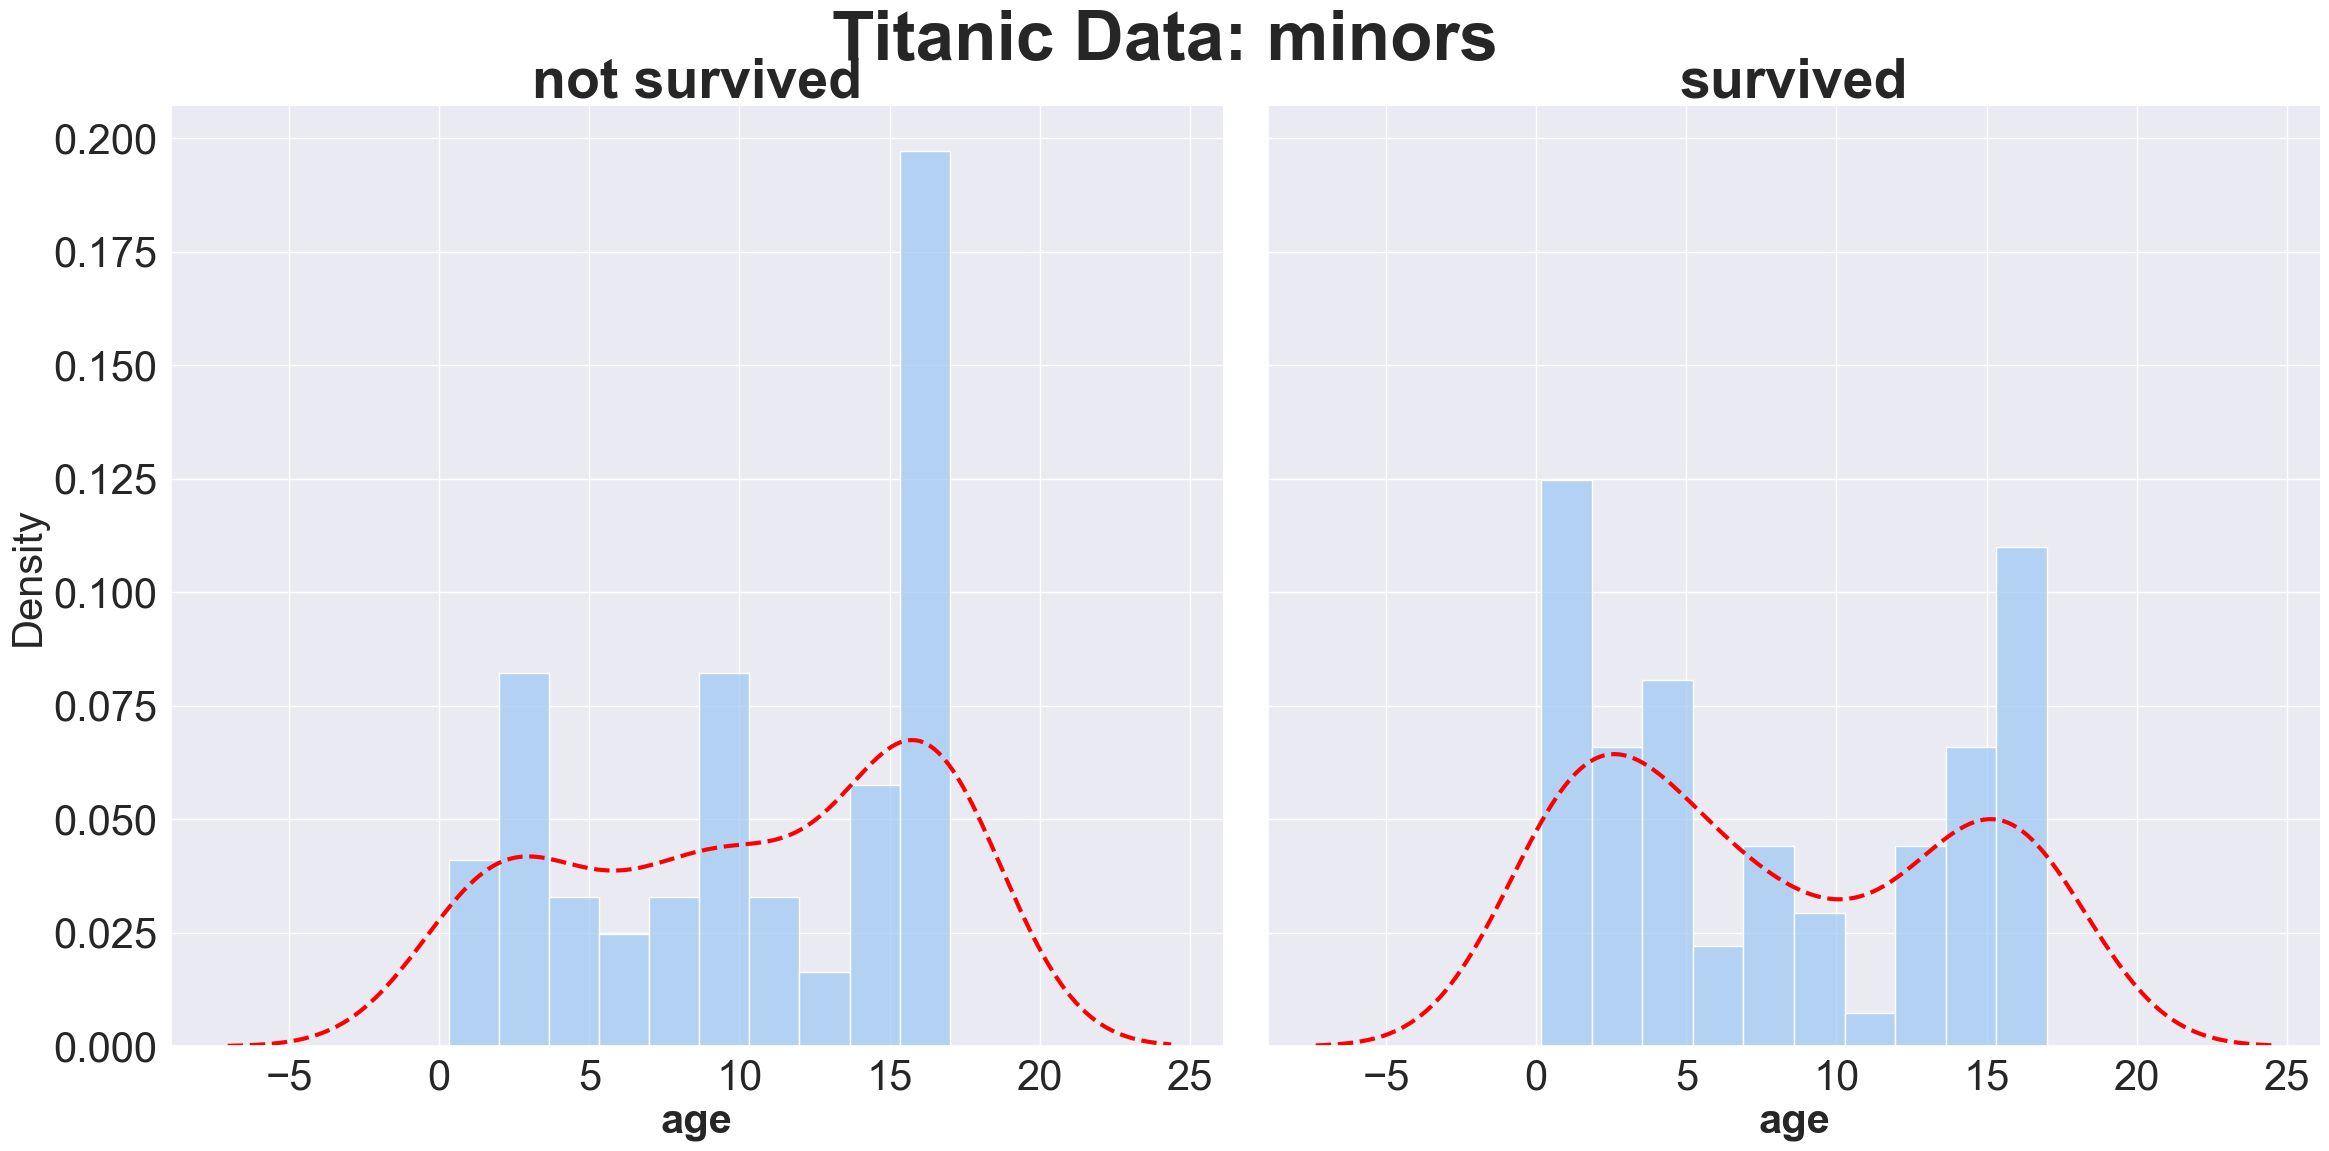

In [31]:
# Add the information of the density estimation to the previous graph
g = sns.FacetGrid(df_minors,col='survived',  margin_titles=True, height=12)
g.map(sns.histplot,'age', bins = 10, stat='density')
g.fig.suptitle('Titanic Data: minors',fontweight='bold', fontsize=50)
g.axes[0,0].set_title('not survived',fontweight='bold', fontsize=40)
g.axes[0,1].set_title('survived',fontweight='bold', fontsize=40)
g.axes[0,0].set_xlabel('age',fontweight='bold', fontsize=30)
g.axes[0,1].set_xlabel('age',fontweight='bold', fontsize=30)
g.axes[0,0].tick_params(labelsize=30)
g.axes[0,1].tick_params(labelsize=30)
# Add func line with the median of density
g.map(sns.kdeplot, 'age', color='r', lw=3, ls='--')



g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp




##	4.8.	Did passenger class make any difference to his survival?  <a name="ch4_8"></a>

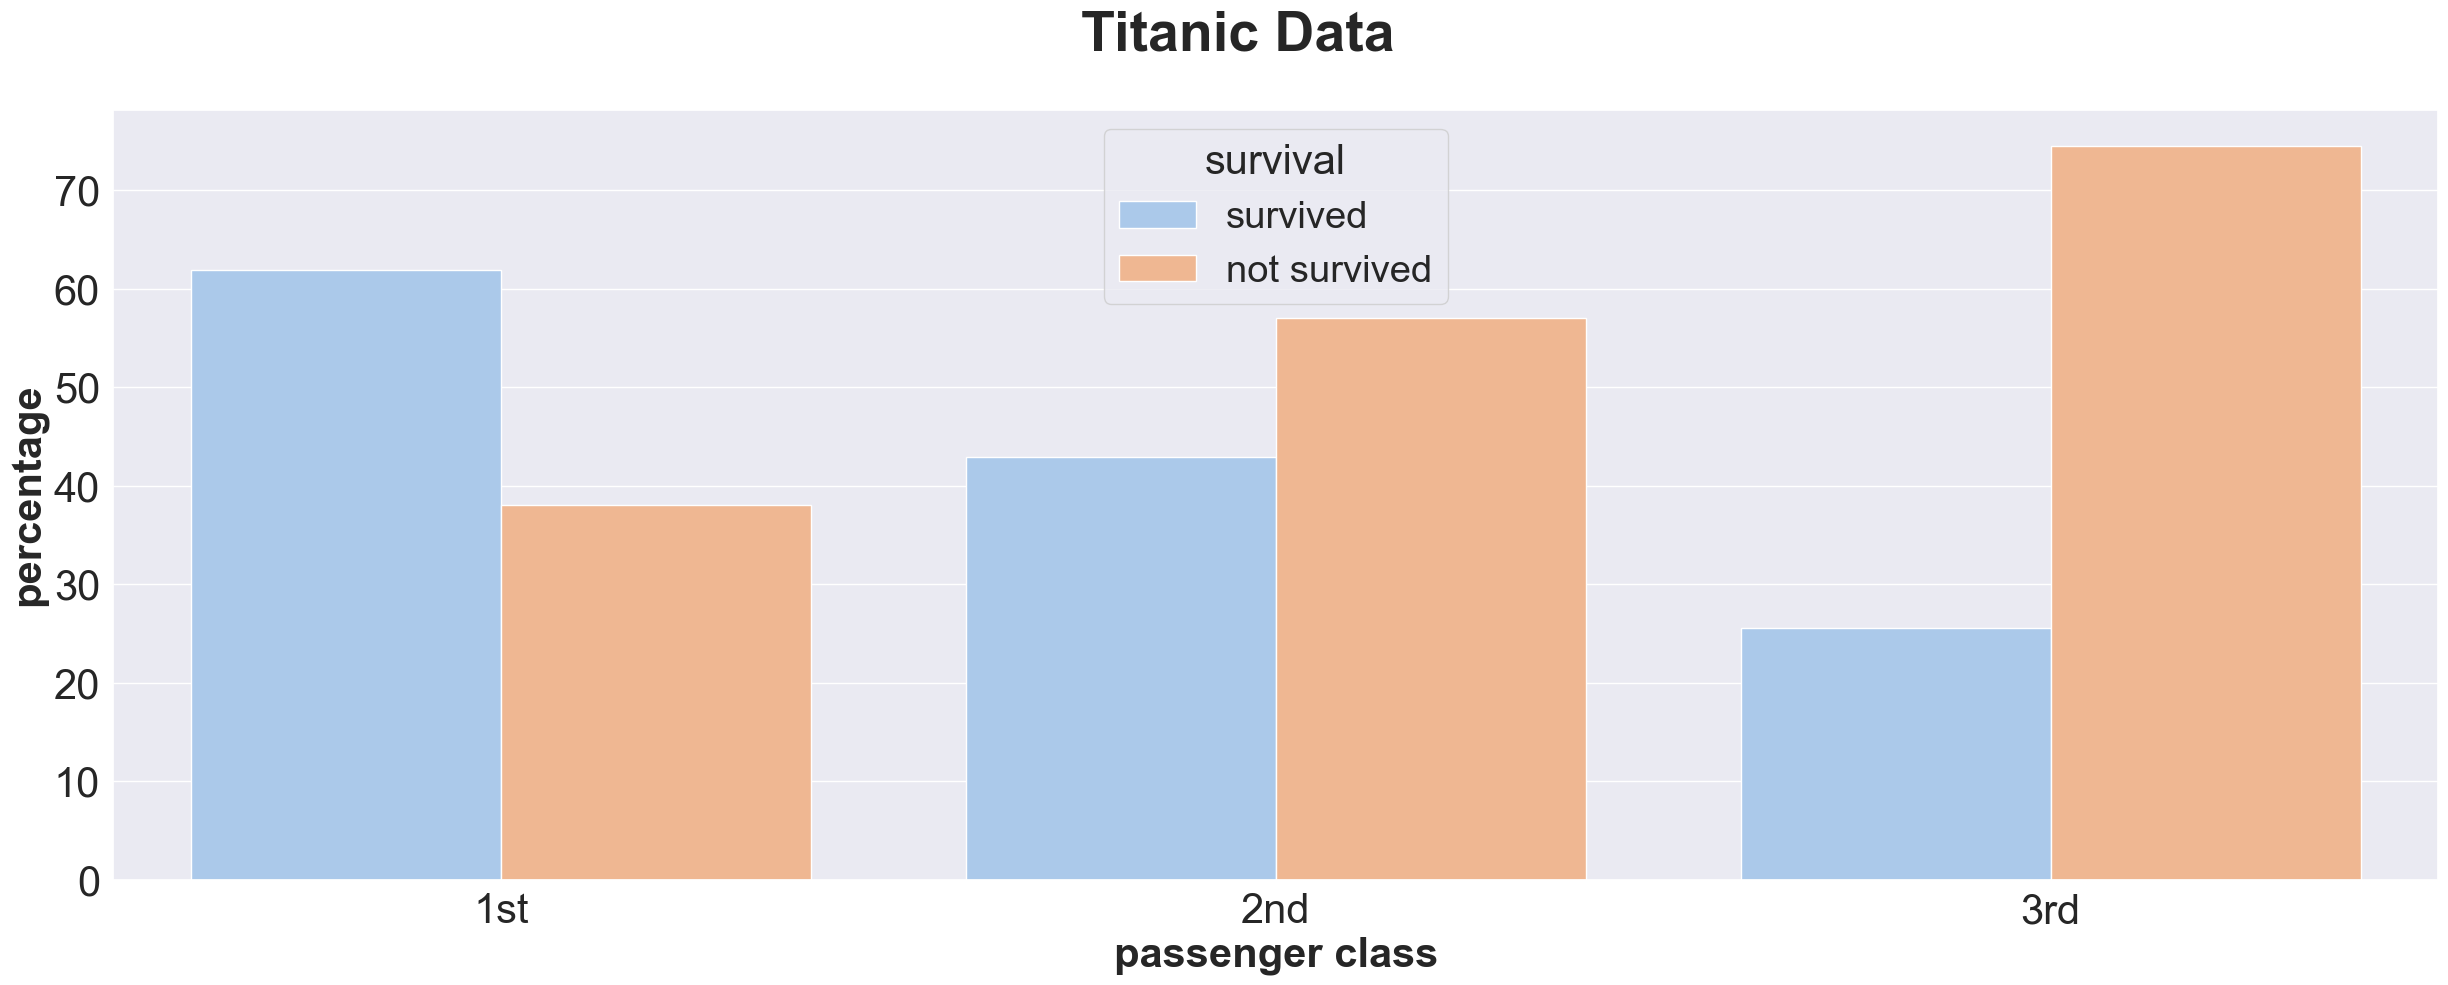

In [15]:
#Sim, o passenger class faz diferença na sobrevivência dos passageiros, visto que a percentagem de survived é maior nas classes 1 e 2 do que na classe 3.

df1 = df.groupby('Pclass')['survival'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

fig, axes = plt.subplots(1 ,figsize=(30, 10))
fig.suptitle('Titanic Data',fontweight='bold', fontsize=40)

g=sns.barplot(data=df1, x='Pclass', y='percent',hue='survival')
g.set_xlabel("passenger class",fontweight='bold', fontsize=30)
g.set_ylabel("percentage",fontweight='bold', fontsize=30)
g.tick_params(labelsize=30)


plt.show()



##	4.9. Show male and female survival per class and by age.  <a name="ch4_9"></a>

C:\Users\TiagoC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\TiagoC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\TiagoC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\TiagoC\AppData\Local\Packages\PythonSoft

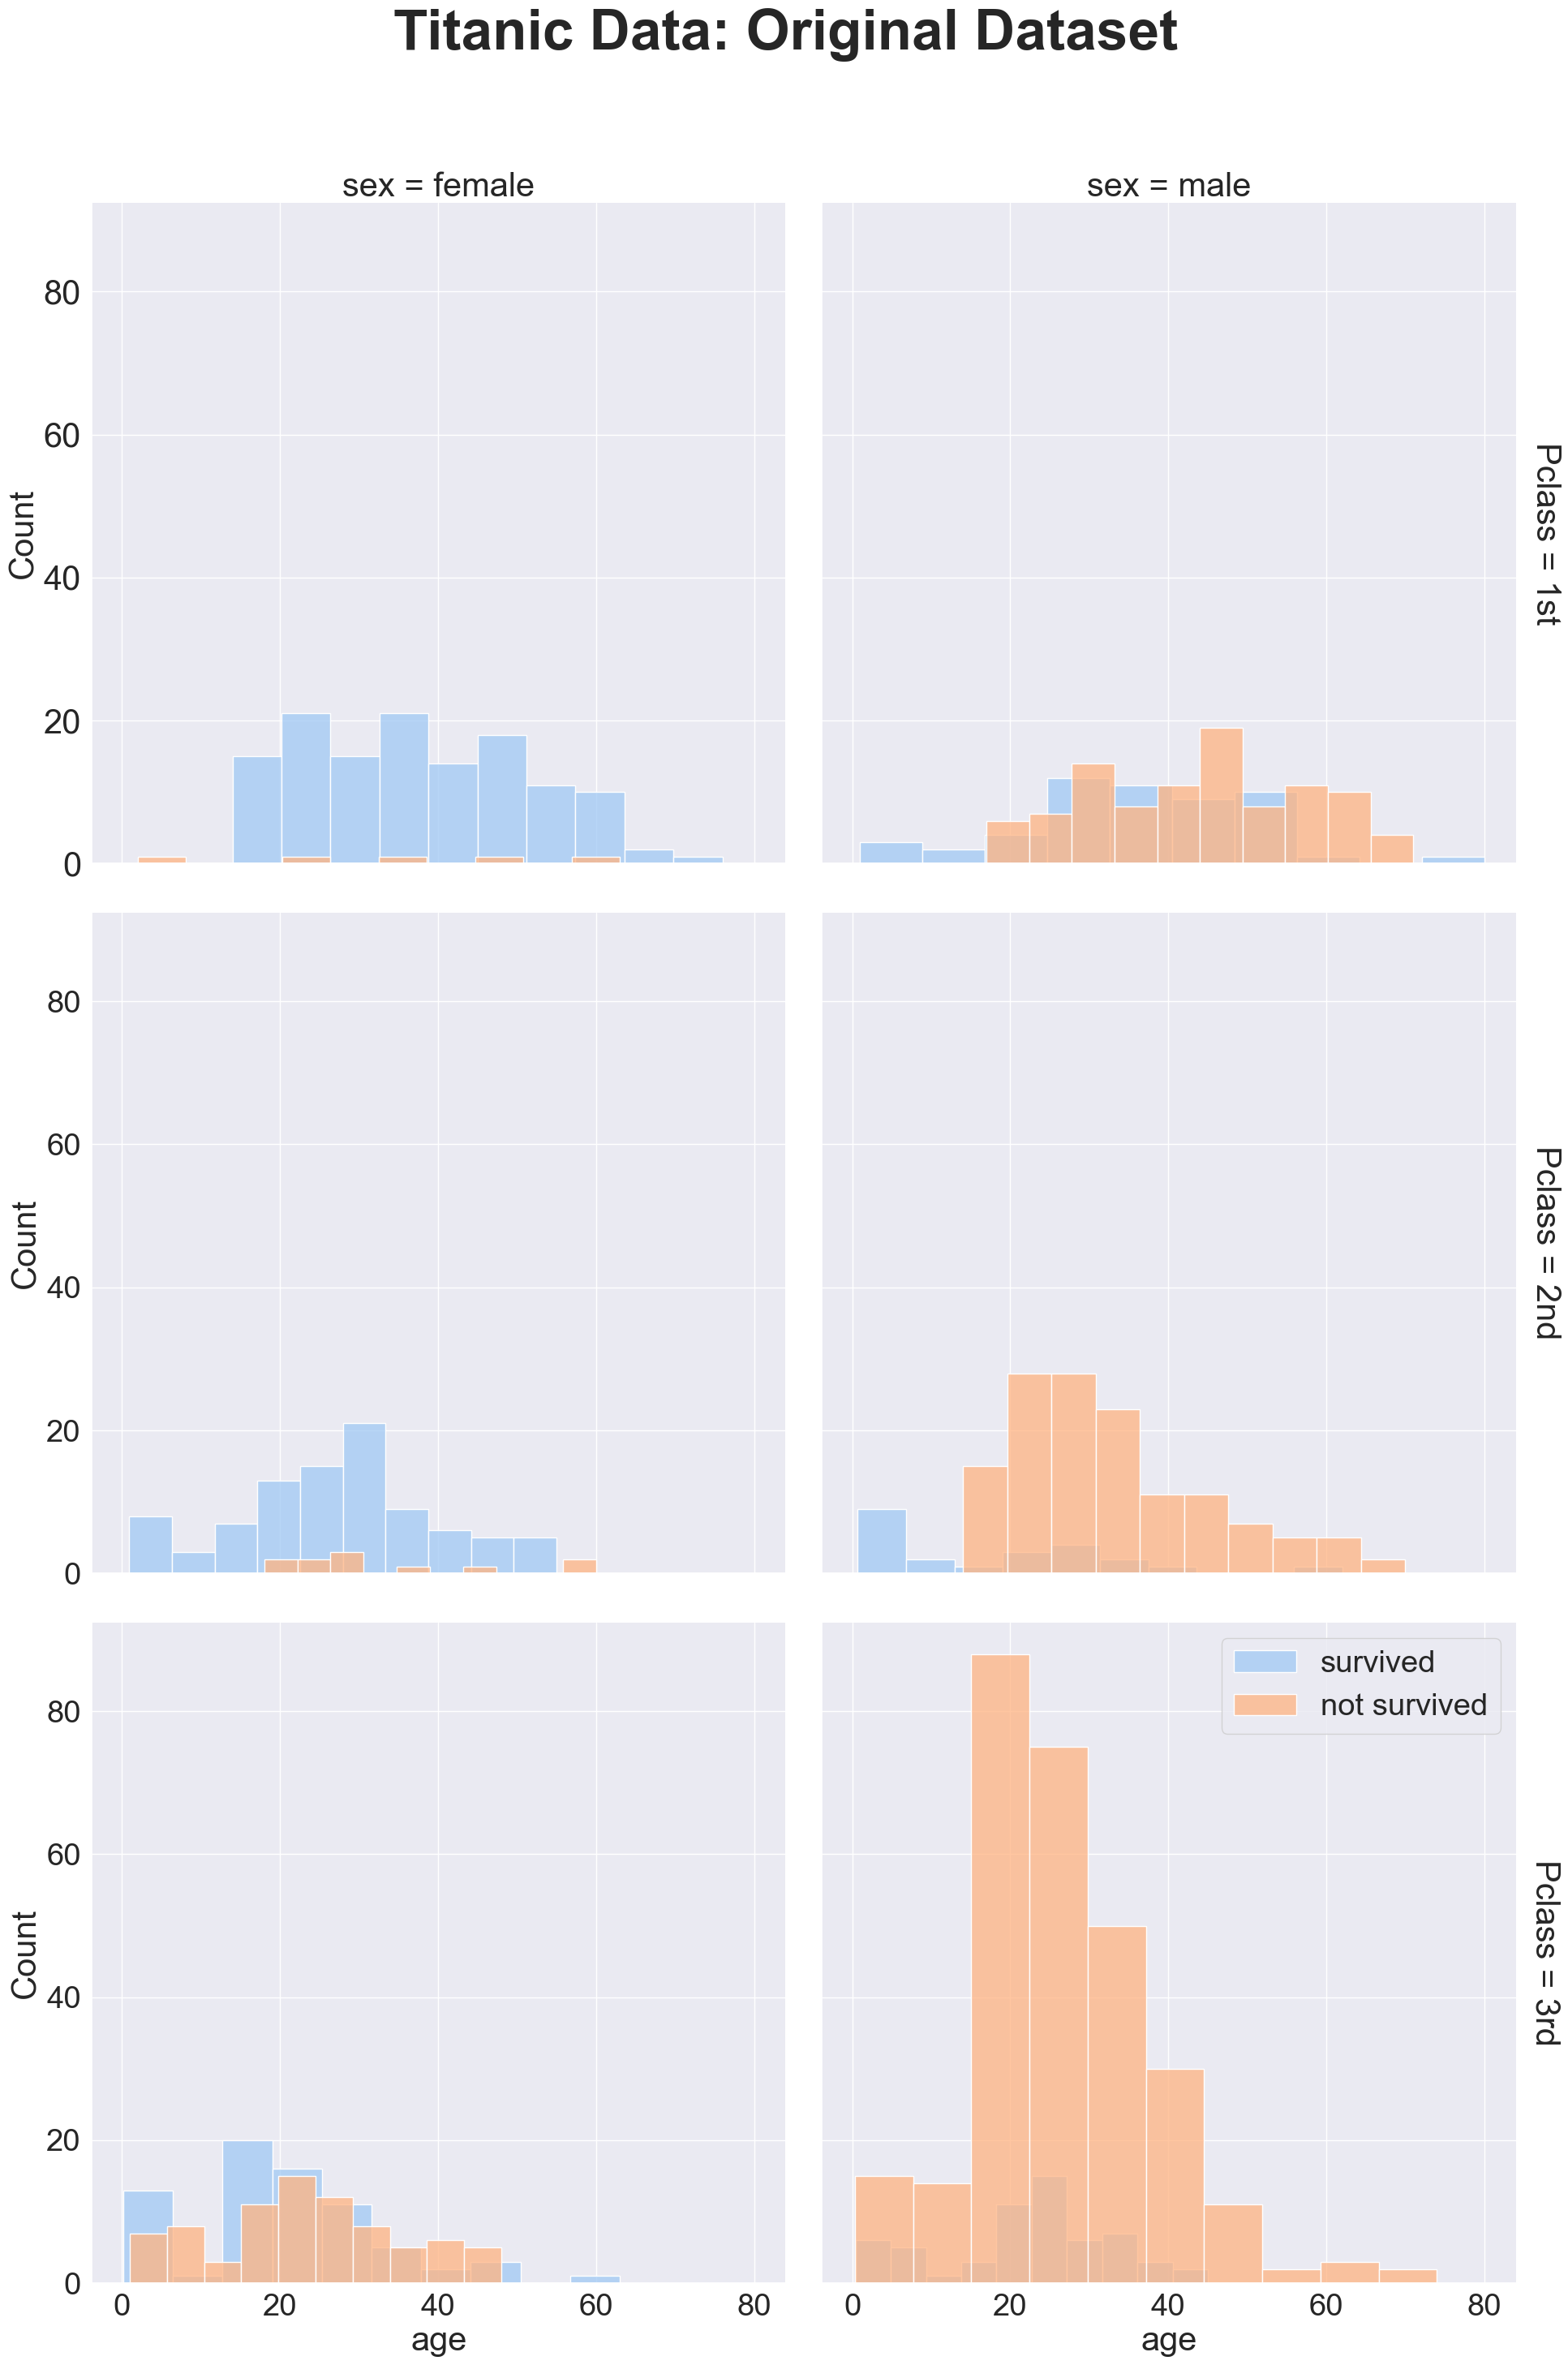

In [34]:
g = sns.FacetGrid(df, col='sex', row = 'Pclass', hue = 'survival', margin_titles=True, height=10)
g.map(sns.histplot,'age', bins = 10)
g.fig.suptitle('Titanic Data: Original Dataset',fontweight='bold', fontsize=50)
g.axes[0,0].set_xlabel('Passenger class',fontweight='bold', fontsize=30)
g.axes[0,1].set_xlabel('Passenger class',fontweight='bold', fontsize=30)
g.axes[0,0].tick_params(labelsize=30)
g.axes[0,1].tick_params(labelsize=30)
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
plt.legend()
plt.show()

##	4.10.	Did a person travelling with others had more survival possibility?  <a name="ch4_10"></a>

        Pass_class          age        sibsp        parch         fare  \
count  1309.000000  1046.000000  1309.000000  1309.000000  1308.000000   
mean      2.294882    29.881135     0.498854     0.385027    33.295479   
std       0.837836    14.413500     1.041658     0.865560    51.758668   
min       1.000000     0.166700     0.000000     0.000000     0.000000   
25%       2.000000    21.000000     0.000000     0.000000     7.895800   
50%       3.000000    28.000000     0.000000     0.000000    14.454200   
75%       3.000000    39.000000     1.000000     0.000000    31.275000   
max       3.000000    80.000000     8.000000     9.000000   512.329200   

          survived       family  travelled_alone  
count  1309.000000  1309.000000      1309.000000  
mean      0.381971     0.883881         0.603514  
std       0.486055     1.583639         0.489354  
min       0.000000     0.000000         0.000000  
25%       0.000000     0.000000         0.000000  
50%       0.000000     0.00

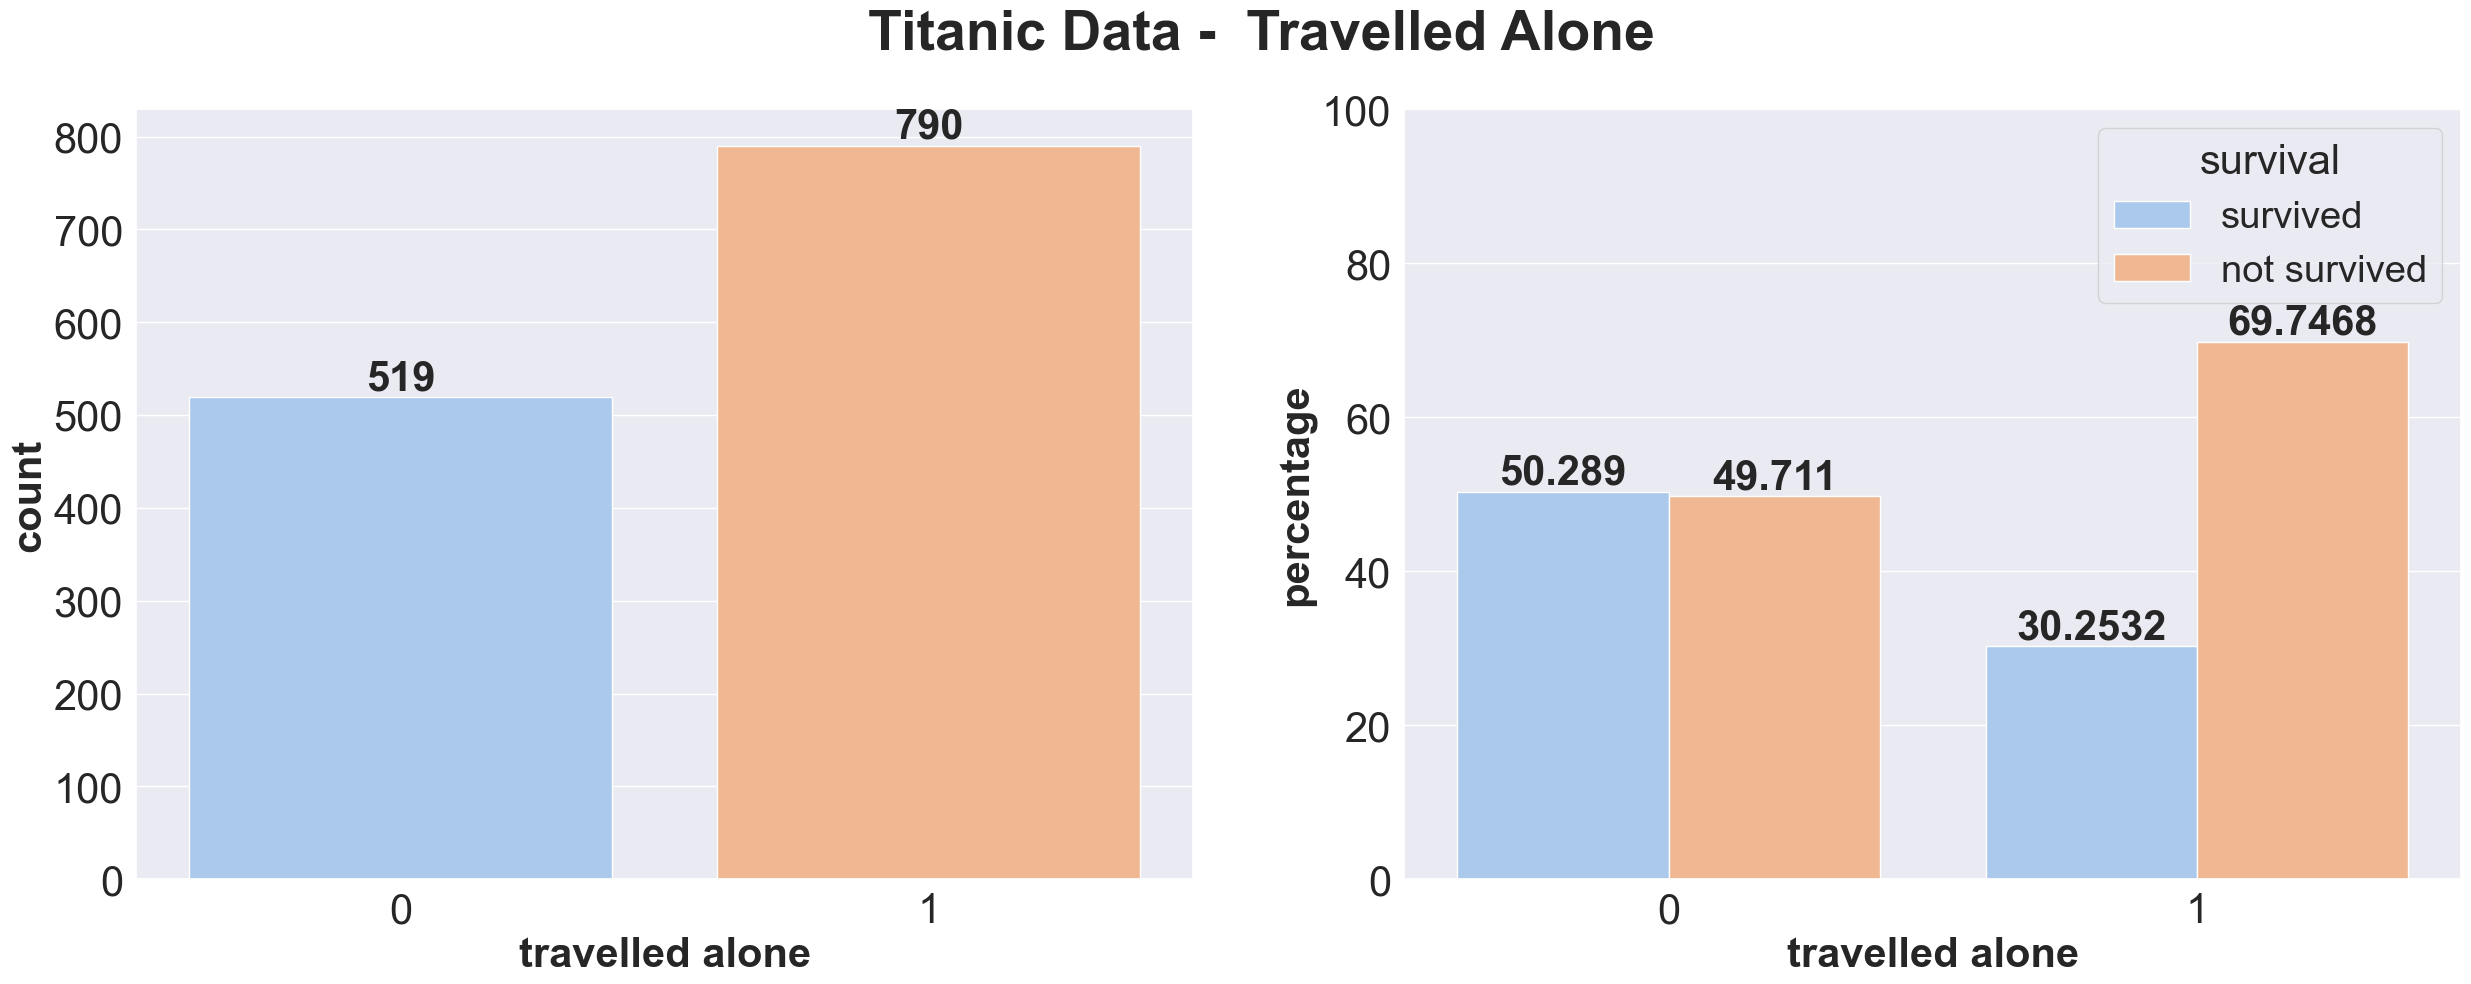

In [53]:
# Did a person travelling with others had more survival possibility? use sisbsp and parch

df['travelled_alone'] = np.where((df.sibsp == 0) & (df.parch == 0), 1, 0)
df['travelled_alone'].value_counts()

print(df.describe())

cross_tab=pd.crosstab(df['travelled_alone'],df['survival'])
print(cross_tab)

cross_tab=pd.crosstab(df['travelled_alone'],df['survival'],normalize='index')
print(cross_tab)


# Plot the survival status of the passengers that travelled alone or not
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('Titanic Data -  Travelled Alone',fontweight='bold', fontsize=40)

g = sns.countplot(ax=axes[0], x='travelled_alone', data=df)
axes[0].bar_label(g.containers[0],fontweight='bold', fontsize=30)
axes[0].set_xlabel("travelled alone",fontweight='bold', fontsize=30)
axes[0].set_ylabel("count",fontweight='bold', fontsize=30)
axes[0].tick_params(labelsize=30)

df1 = df.groupby('travelled_alone')['survival'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.barplot(ax=axes[1], x='travelled_alone', y='percent',hue='survival',data=df1)
axes[1].bar_label(g.containers[0],fontweight='bold', fontsize=30)
axes[1].bar_label(g.containers[1],fontweight='bold', fontsize=30)
axes[1].set_xlabel("travelled alone",fontweight='bold', fontsize=30)
axes[1].set_ylabel("percentage",fontweight='bold', fontsize=30)
axes[1].set_ylim(0,100)
axes[1].tick_params(labelsize=30)

plt.show()


##	4.11.	How does Embarkation vary across age? <a name="ch4_11"></a>

C:\Users\TiagoC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\TiagoC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\TiagoC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


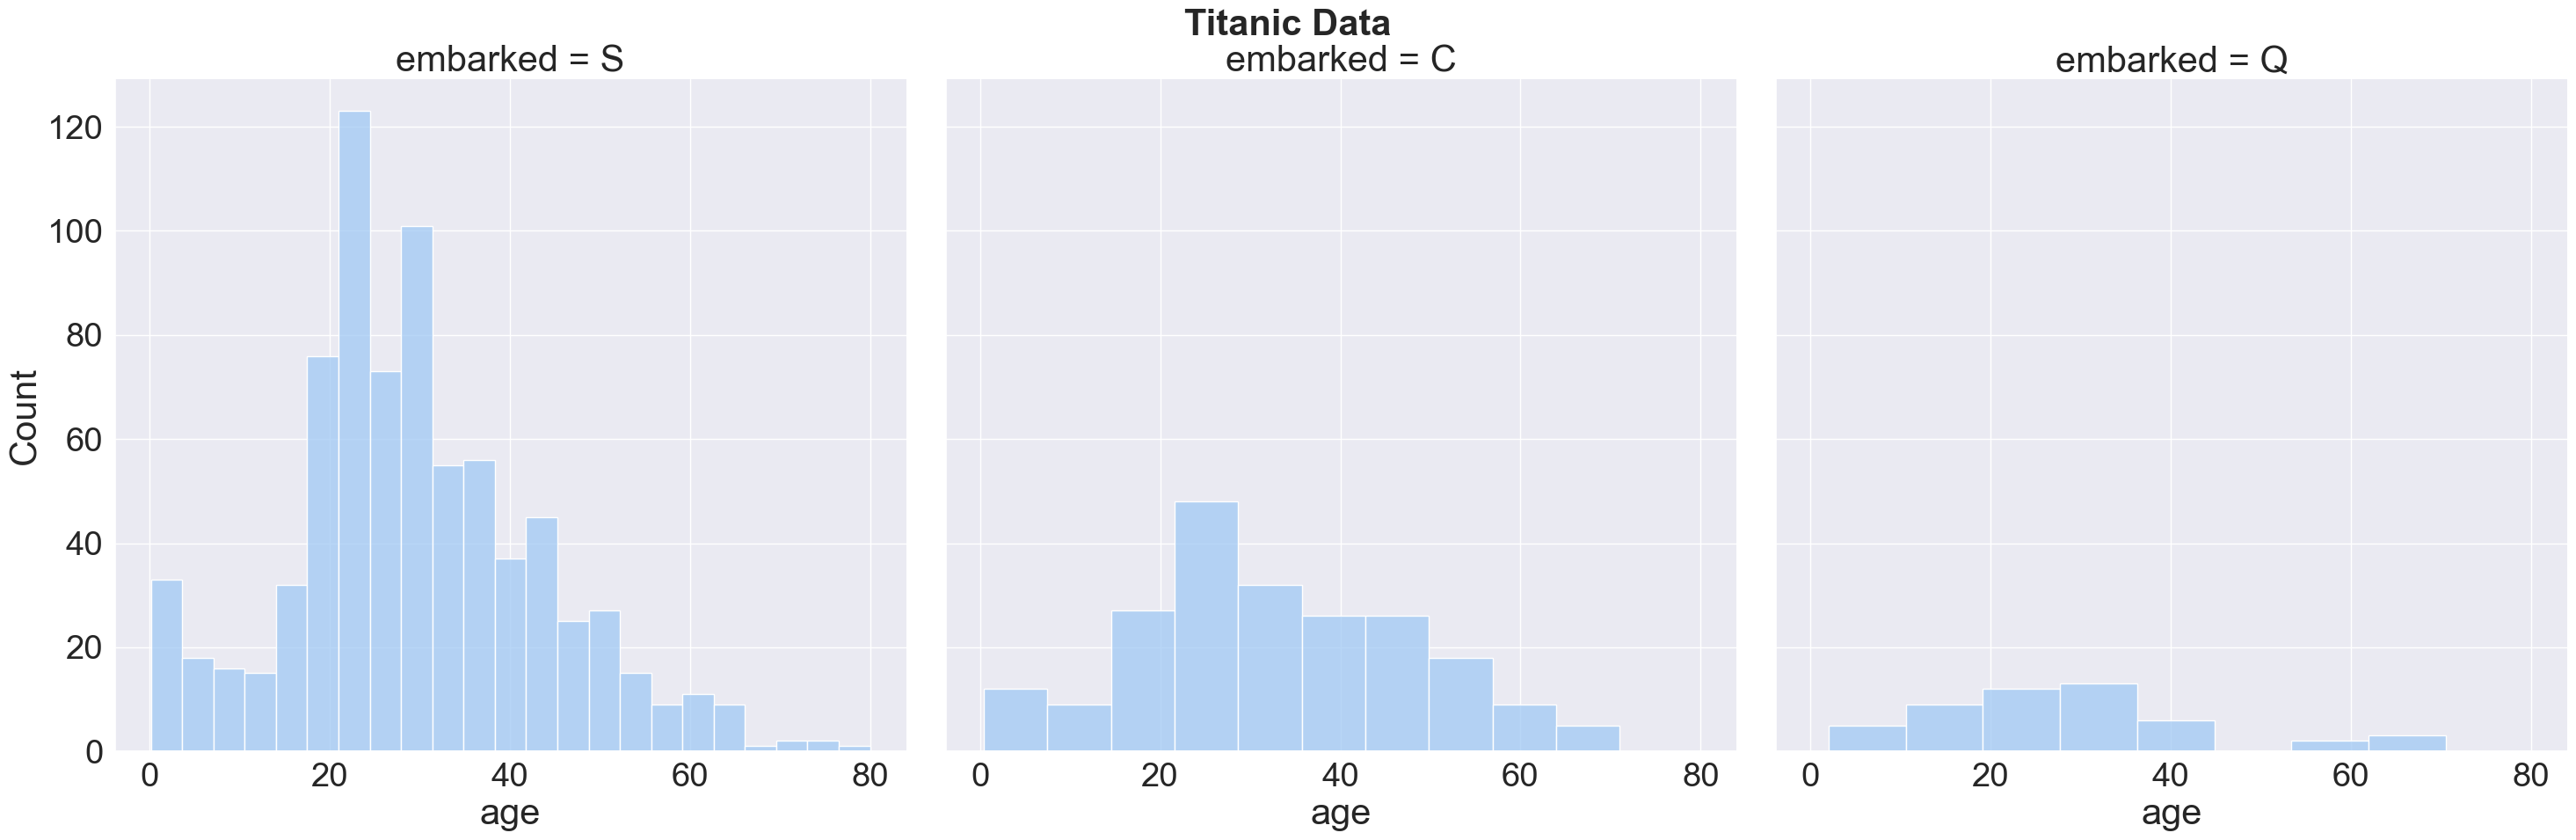

In [18]:
g = sns.FacetGrid(df,col='embarked', margin_titles=True, height=10)
g.map(sns.histplot, 'age')
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Titanic Data',fontweight='bold', fontsize=30)
plt.show()

##	4.12.	Show the distribution of ticked fare w.r.t ticket class and gender. <a name="ch4_12"></a>

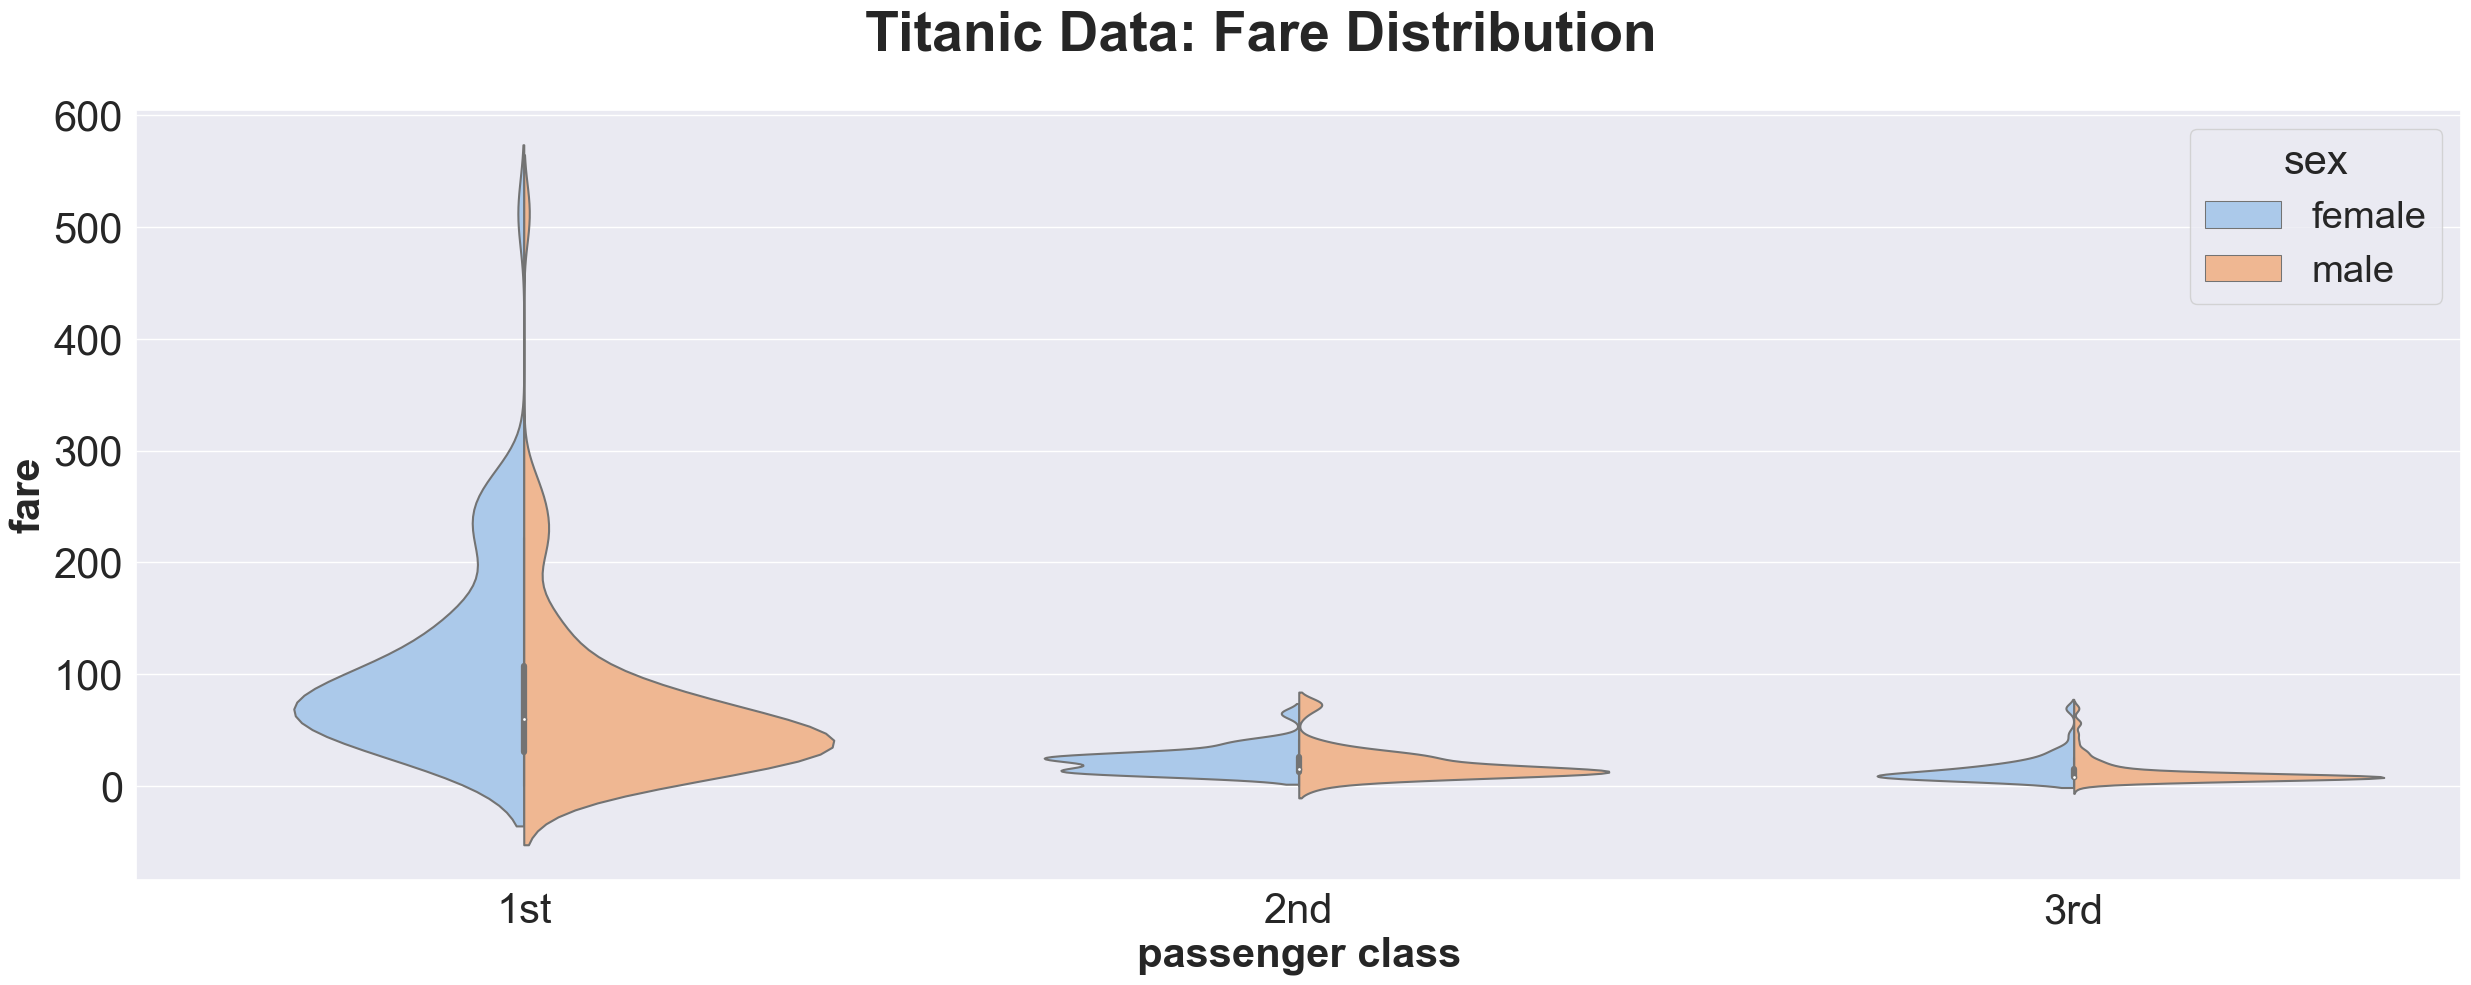

In [61]:
#Show the distribution of ticked fare w.r.t ticket class and gender with vioinplot
fig=plt.figure(figsize=(30,10))
fig.suptitle('Titanic Data: Fare Distribution',fontweight='bold', fontsize=40)
g=sns.violinplot(data=df,x='Pclass',y='fare', hue='sex', split=True)
g.set_xlabel("passenger class",fontweight='bold', fontsize=30)
g.set_ylabel("fare",fontweight='bold', fontsize=30)
g.tick_params(labelsize=30)
plt.show()





##	4.13.	Inspect the association between passenger class and fare. <a name="ch4_13"></a>

In [72]:
#Inspect the association between passenger class and fare with correlation matrix
df1 = df[['Pclass','fare']]
df1.corr(method='pearson')





C:\Users\TiagoC\AppData\Local\Temp\ipykernel_26212\117709784.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr(method='pearson')


,fare
fare,1.0


##	4.14. Show the relationship between the attributes age and fare. <a name="ch4_14"></a>

<AxesSubplot: xlabel='age', ylabel='fare'>

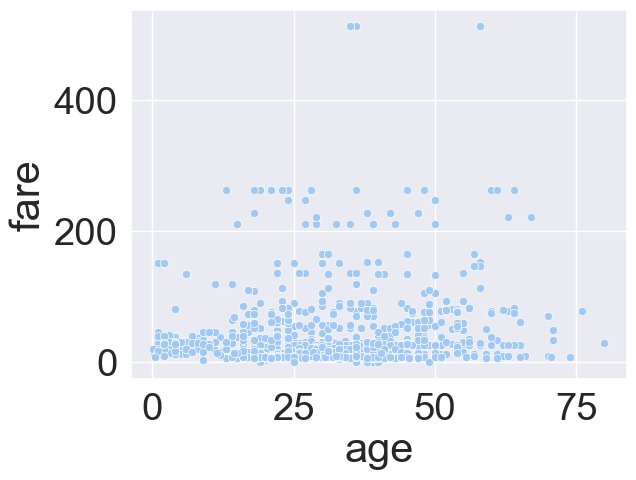

<Figure size 3000x1000 with 0 Axes>

In [68]:
#Show the relationship between the attributes age and fare.
sns.scatterplot(data=df, x='age', y='fare')

fig=plt.figure(figsize=(30,10))
sns.scatterplot(ax=axes[0],data=df, x='age', y='fare')

sns.scatterplot(ax=axes[1],data=df, x='age', y='fare', hue='survival')


##	4.15.	Which are the features that most correlate with survival status? <a name="ch4_15"></a>

In [22]:
#Which are the features that most correlate with survival status? 
#Correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')



C:\Users\TiagoC\AppData\Local\Temp\ipykernel_26212\3325332610.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Pass_class,age,sibsp,parch,fare,survived
Pass_class,1.000000,-0.408106,0.060832,0.018322,-0.558629,-0.312469
age,-0.408106,1.000000,-0.243699,-0.150917,0.178739,-0.055513
sibsp,0.060832,-0.243699,1.000000,0.373587,0.160238,-0.027825
parch,0.018322,-0.150917,0.373587,1.000000,0.221539,0.082660
fare,-0.558629,0.178739,0.160238,0.221539,1.000000,0.244265
survived,-0.312469,-0.055513,-0.027825,0.082660,0.244265,1.000000
